In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import datetime

import matplotlib as mpl
fp = mpl.font_manager.FontProperties(family='Tahoma',size=13)

%matplotlib inline

# Import Data

In [124]:
#df = pd.read_csv('chaiyo_encode_data.csv', index_col=0)
df = pd.read_csv('chaiyo_clean_90_v2.csv', index_col=0)
df

Principal Approve Amount  Principal Amount  \
0                     199000.0         199000.00   
1                      60000.0          58822.04   
2                      36000.0          35904.37   
3                      30000.0          28813.69   
4                     200000.0         200000.00   
...                        ...               ...   
4024                   14000.0          14000.00   
4025                   45000.0          45000.00   
4027                  144000.0         144000.00   
4029                   39000.0          39000.00   
4030                  300000.0         300000.00   

      Repayment Tenor Month Number Gender Occupation Description  \
0                               60      F          STREET VENDOR   
1                               36      M                  อื่นๆ   
2                               24      F          พนักงานบริษัท   
3                               24      F                เกษตรกร   
4                               36      M          พนักงานบริษัท   
...                            ...    ...                    ...   
4024                            12      F          STREET VENDOR   
4025                            18      F          พนักงานบริษัท   
4027                            60      M              ข้าราชการ   
4029                            36      F          พนักงานบริษัท   
4030                            60      F                เกษตรกร   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
0                         20000.0                   PU        NISSAN   
1                         14000.0                  CAR        TOYOTA   
2                         15000.0                   MC         HONDA   
3                         35000.0                   MC         HONDA   
4                         40000.0                   PU         ISUZU   
...                           ...                  ...           ...   
4024                      15000.0                   MC        YAMAHA   
4025                      40000.0                   MC         HONDA   
4027                      36000.0                  CAR        TOYOTA   
4029                      15000.0                   MC         HONDA   
4030                      20000.0                   PU        NISSAN   

        Vehicle Model  Vehicle Release Year Vehicle Sub Model  \
0     FRONTIER NAVARA                  2012                AD   
1       COROLLA ALTIS                  2002                AJ   
2          CLICK 150I                  2019                BH   
3             PCX 150                  2020                ED   
4               D-MAX                  2013                BU   
...               ...                   ...               ...   
4024     FINO (MLEKE)                  2009                AH   
4025          PCX 150                  2017                CQ   
4027             VIOS                  2010                DX   
4029       DREAM 110I                  2017                CO   
4030           NAVARA                  2019                DQ   

      Evaluation Amount System CAR Code (Daily) System CAR Code Date  \
0                283500                      S1           2022-11-14   
1                111000                      S1           2022-09-06   
2                 48500                      S1           2022-12-30   
3                 76500                      S1           2022-11-12   
4                414500                      S1           2022-12-29   
...                 ...                     ...                  ...   
4024              23000                      S3           2022-12-24   
4025              61500                      S3           2022-12-27   
4027             222000                      S3           2022-12-29   
4029              53000                      S3           2022-12-29   
4030             484500                      S3           2022-12-29   

     Final CAR Code Previous Month  DPD  age  Vehicle

In [125]:
df = df.rename(columns=lambda x: x.strip().replace(' ', '_'))
df.head()

Principal_Approve_Amount  Principal_Amount  Repayment_Tenor_Month_Number  \
0                  199000.0         199000.00                            60   
1                   60000.0          58822.04                            36   
2                   36000.0          35904.37                            24   
3                   30000.0          28813.69                            24   
4                  200000.0         200000.00                            36   

  Gender Occupation_Description  Total_Income_Amount_(Month)  \
0      F          STREET VENDOR                      20000.0   
1      M                  อื่นๆ                      14000.0   
2      F          พนักงานบริษัท                      15000.0   
3      F                เกษตรกร                      35000.0   
4      M          พนักงานบริษัท                      40000.0   

  Collateral_Type_Code Vehicle_Brand    Vehicle_Model  Vehicle_Release_Year  \
0                   PU        NISSAN  FRONTIER NAVARA                  2012   
1                  CAR        TOYOTA    COROLLA ALTIS                  2002   
2                   MC         HONDA       CLICK 150I                  2019   
3                   MC         HONDA          PCX 150                  2020   
4                   PU         ISUZU            D-MAX                  2013   

  Vehicle_Sub_Model  Evaluation_Amount System_CAR_Code_(Daily)  \
0                AD             283500                      S1   
1                AJ             111000                      S1   
2                BH              48500                      S1   
3                ED              76500                      S1   
4                BU             414500                      S1   

  System_CAR_Code_Date Final_CAR_Code_Previous_Month DPD  age  Vehicle_Age  \
0           2022-11-14                            S1  PL   44           11   
1           2022-09-06                            S1  PL   53           21   
2           2022-12-30                            S2  PL   32            4   
3           2022-11-12                            S1  PL   37            3   
4           2022-12-29                            S1  PL   57           10   

     per_LTV per_LTV_cate  
0  70.194004       65-75%  
1  54.054054       50-65%  
2  74.226804       65-75%  
3  39.215686       30-50%  
4  48.250905       30-50%

In [126]:
category = ['Gender','Occupation_Description','Collateral_Type_Code','Vehicle_Brand','Vehicle_Model']

for i in category:
    print(f'{i}:{df[i].unique()}\n')

Gender:['F' 'M']

Occupation_Description:['STREET VENDOR' 'อื่นๆ' 'พนักงานบริษัท' 'เกษตรกร' 'ข้าราชการ'
 'เลี้ยงสัตว์' 'บุคลากรทางการแพทย์' 'อาจารย์' 'พนักงานรัฐวิสาหกิจ']

Collateral_Type_Code:['PU' 'CAR' 'MC' 'VAN' 'TRUCK']

Vehicle_Brand:['NISSAN' 'TOYOTA' 'HONDA' 'ISUZU' 'YAMAHA' 'MITSUBISHI' 'MAZDA' 'SUZUKI'
 'KAWASAKI' 'FORD' 'RYUKA' 'VESPA' 'GPX' 'HINO' 'MG' 'CHEVROLET' 'TATA'
 'KIA' 'STALLION' 'HYUNDAI' 'PROTON' 'LAMBRETTA' 'BENELLI']

Vehicle_Model:['FRONTIER NAVARA' 'COROLLA ALTIS' 'CLICK 150I' 'PCX 150' 'D-MAX'
 'HILUX TIGER' 'SCOOPY I' 'WAVE 110 I' 'MARCH' 'TTX 115' 'WAVE X'
 'DREAM 110' 'GRAND FILANO 125' 'HILUX VIGO' 'ALMERA' 'VIOS' 'TRITON'
 'CITY' 'MIO 115' 'MSX 125' 'M-SLAZ 150' 'CIVIC' 'CLICK 125I' 'CAMRY'
 'MT 15' 'CB 150' 'SUPER CUB 110' 'WAVE 125 I' 'FINO (MLEKE)' 'XTRAIL'
 'DREAM 110I' 'COROLLA' 'WAVE 100' 'BT-50' 'PCX 160' 'JAZZ' 'CR-V'
 'SMASH 115' 'CIAZ' 'QBIX 125 S' 'CLICK 110' 'AEROX 155' 'ER6N 650'
 'NP300' 'WAVE 125' 'WAVE 125 X' 'MIRAGE' 'MIO 125' 'SWIFT' 

In [127]:
df[df['DPD']=='PL'].shape

(3355, 20)

In [128]:
df[df['DPD']=='NPL'].shape

(55, 20)

In [129]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Occupation_Description','Collateral_Type_Code','Vehicle_Brand','Vehicle_Model','System_CAR_Code_(Daily)','Final_CAR_Code_Previous_Month']

le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [130]:
category = ['Gender','Occupation_Description','Collateral_Type_Code','Vehicle_Brand','Vehicle_Model']

for i in category:
    print(f'{i}:{df[i].unique()}\n')

Gender:[0 1]

Occupation_Description:[0 6 3 7 1 8 2 5 4]

Collateral_Type_Code:[2 0 1 4 3]

Vehicle_Brand:[14 20  5  7 22 13 11 18  8  2 16 21  3  4 12  1 19  9 17  6 15 10  0]

Vehicle_Model:[ 78  39  34 133  49  89 154 190 108 185 196  54  81  90   6 188 184  28
 110 117 107  29  33  14 118  18 175 193  71 201  55  38 189  12 135  93
  42 161  27 143  31   4  60 129 192 194 114 112 177   0  76  70   2  35
   7 144 202 155  45  13 106  77 100 102  64 119  16   3  19 176  86  52
  69 134 191 153  83 162  53  65  51  68  32 121 164  37  72 109 171 179
 174  66  30 198 103 208  10  73 120  99  63  74 159 169 204  96  36   1
 199 149  79  75 131 123 116  48   5 148  97 168 127 200  88  92 206 203
 195  82 139 167 141 178  67  91 130 163   8 197  17  43 105 166 180  59
   9 113 128  15 126  44  50  98 138 137  11 173 186  26 115  56  23 142
 205  47 182  80  58 147 152  94 101  85  25 122 157 170  84  46 165 156
 172 111  40  87 136 146  22 124  57 140 150 160  24 104  41 151  95 181
 145 

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3410 entries, 0 to 4030
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Principal_Approve_Amount       3410 non-null   float64
 1   Principal_Amount               3410 non-null   float64
 2   Repayment_Tenor_Month_Number   3410 non-null   int64  
 3   Gender                         3410 non-null   int32  
 4   Occupation_Description         3410 non-null   int32  
 5   Total_Income_Amount_(Month)    3410 non-null   float64
 6   Collateral_Type_Code           3410 non-null   int32  
 7   Vehicle_Brand                  3410 non-null   int32  
 8   Vehicle_Model                  3410 non-null   int32  
 9   Vehicle_Release_Year           3410 non-null   int64  
 10  Vehicle_Sub_Model              3410 non-null   object 
 11  Evaluation_Amount              3410 non-null   int64  
 12  System_CAR_Code_(Daily)        3410 non-null   i

In [132]:
df.describe().round(2)

Principal_Approve_Amount  Principal_Amount  \
count                   3410.00           3410.00   
mean                   75629.66          74669.25   
std                    79271.47          79109.90   
min                     3000.00           1583.59   
25%                    22525.00          21643.71   
50%                    30000.00          29975.93   
75%                   125750.00         124864.20   
max                   314000.00         314000.00   

       Repayment_Tenor_Month_Number   Gender  Occupation_Description  \
count                       3410.00  3410.00                 3410.00   
mean                          36.55     0.45                    3.61   
std                           16.23     0.50                    2.61   
min                           12.00     0.00                    0.00   
25%                           24.00     0.00                    1.00   
50%                           36.00     0.00                    3.00   
75%                           60.00     1.00                    6.00   
max                           60.00     1.00                    8.00   

       Total_Income_Amount_(Month)  Collateral_Type_Code  Vehicle_Brand  \
count                      3410.00               3410.00        3410.00   
mean                      19168.37                  1.03          10.15   
std                        7843.54                  0.66           7.03   
min                        6500.00                  0.00           0.00   
25%                       13500.00                  1.00           5.00   
50%                       18000.00                  1.00           5.00   
75%                       24805.00                  1.00          20.00   
max                       41308.00                  4.00          22.00   

       Vehicle_Model  Vehicle_Release_Year  Evaluation_Amount  \
count        3410.00               3410.00            3410.00   
mean          121.26               2012.75          120642.87   
std            64.95                  5.32          122898.83   
min             0.00               1990.00           10000.00   
25%            55.00               2009.00           35000.00   
50%           132.50               2013.00           44000.00   
75%           190.00               2017.00          209375.00   
max           208.00               2022.00          831000.00   

       System_CAR_Code_(Daily)  Final_CAR_Code_Previous_Month      age  \
count                  3410.00                         3410.0  3410.00   
mean                      0.29                            0.1    41.23   
std                       0.51                            0.3    10.71   
min                       0.00                            0.0    21.00   
25%                       0.00                            0.0    33.00   
50%                       0.00                            0.0    40.00   
75%                       1.00                            0.0    49.00   
max                       2.00                            2.0    72.00   

       Vehicle_Age  per_LTV  
count      3410.00  3410.00  
mean         10.25    66.04  
std           5.32    23.76  
min           1.00     3.02  
25%           6.00    62.86  
50%          10.00    71.43  
75%          14.00    74.88  
max          33.00   657.14

In [133]:
df.columns

Index(['Principal_Approve_Amount', 'Principal_Amount',
       'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand',
       'Vehicle_Model', 'Vehicle_Release_Year', 'Vehicle_Sub_Model',
       'Evaluation_Amount', 'System_CAR_Code_(Daily)', 'System_CAR_Code_Date',
       'Final_CAR_Code_Previous_Month', 'DPD', 'age', 'Vehicle_Age', 'per_LTV',
       'per_LTV_cate'],
      dtype='object')

In [134]:
df.head(5)

Principal_Approve_Amount  Principal_Amount  Repayment_Tenor_Month_Number  \
0                  199000.0         199000.00                            60   
1                   60000.0          58822.04                            36   
2                   36000.0          35904.37                            24   
3                   30000.0          28813.69                            24   
4                  200000.0         200000.00                            36   

   Gender  Occupation_Description  Total_Income_Amount_(Month)  \
0       0                       0                      20000.0   
1       1                       6                      14000.0   
2       0                       3                      15000.0   
3       0                       7                      35000.0   
4       1                       3                      40000.0   

   Collateral_Type_Code  Vehicle_Brand  Vehicle_Model  Vehicle_Release_Year  \
0                     2             14             78                  2012   
1                     0             20             39                  2002   
2                     1              5             34                  2019   
3                     1              5            133                  2020   
4                     2              7             49                  2013   

  Vehicle_Sub_Model  Evaluation_Amount  System_CAR_Code_(Daily)  \
0                AD             283500                        0   
1                AJ             111000                        0   
2                BH              48500                        0   
3                ED              76500                        0   
4                BU             414500                        0   

  System_CAR_Code_Date  Final_CAR_Code_Previous_Month DPD  age  Vehicle_Age  \
0           2022-11-14                              0  PL   44           11   
1           2022-09-06                              0  PL   53           21   
2           2022-12-30                              1  PL   32            4   
3           2022-11-12                              0  PL   37            3   
4           2022-12-29                              0  PL   57           10   

     per_LTV per_LTV_cate  
0  70.194004       65-75%  
1  54.054054       50-65%  
2  74.226804       65-75%  
3  39.215686       30-50%  
4  48.250905       30-50%

In [135]:
df.describe().round(2)

Principal_Approve_Amount  Principal_Amount  \
count                   3410.00           3410.00   
mean                   75629.66          74669.25   
std                    79271.47          79109.90   
min                     3000.00           1583.59   
25%                    22525.00          21643.71   
50%                    30000.00          29975.93   
75%                   125750.00         124864.20   
max                   314000.00         314000.00   

       Repayment_Tenor_Month_Number   Gender  Occupation_Description  \
count                       3410.00  3410.00                 3410.00   
mean                          36.55     0.45                    3.61   
std                           16.23     0.50                    2.61   
min                           12.00     0.00                    0.00   
25%                           24.00     0.00                    1.00   
50%                           36.00     0.00                    3.00   
75%                           60.00     1.00                    6.00   
max                           60.00     1.00                    8.00   

       Total_Income_Amount_(Month)  Collateral_Type_Code  Vehicle_Brand  \
count                      3410.00               3410.00        3410.00   
mean                      19168.37                  1.03          10.15   
std                        7843.54                  0.66           7.03   
min                        6500.00                  0.00           0.00   
25%                       13500.00                  1.00           5.00   
50%                       18000.00                  1.00           5.00   
75%                       24805.00                  1.00          20.00   
max                       41308.00                  4.00          22.00   

       Vehicle_Model  Vehicle_Release_Year  Evaluation_Amount  \
count        3410.00               3410.00            3410.00   
mean          121.26               2012.75          120642.87   
std            64.95                  5.32          122898.83   
min             0.00               1990.00           10000.00   
25%            55.00               2009.00           35000.00   
50%           132.50               2013.00           44000.00   
75%           190.00               2017.00          209375.00   
max           208.00               2022.00          831000.00   

       System_CAR_Code_(Daily)  Final_CAR_Code_Previous_Month      age  \
count                  3410.00                         3410.0  3410.00   
mean                      0.29                            0.1    41.23   
std                       0.51                            0.3    10.71   
min                       0.00                            0.0    21.00   
25%                       0.00                            0.0    33.00   
50%                       0.00                            0.0    40.00   
75%                       1.00                            0.0    49.00   
max                       2.00                            2.0    72.00   

       Vehicle_Age  per_LTV  
count      3410.00  3410.00  
mean         10.25    66.04  
std           5.32    23.76  
min           1.00     3.02  
25%           6.00    62.86  
50%          10.00    71.43  
75%          14.00    74.88  
max          33.00   657.14

In [136]:
#sns.pairplot(df, hue="DPD")

<Figure size 1500x1000 with 0 Axes>

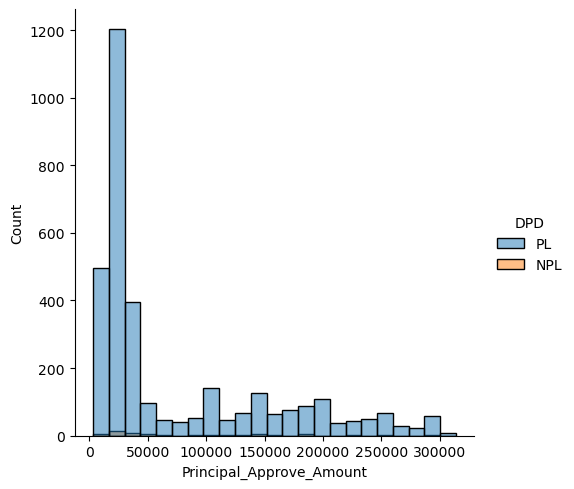

In [137]:
plt.figure(figsize=(15,10))
sns.displot(data=df, x="Principal_Approve_Amount", hue="DPD")

<Figure size 1500x1000 with 0 Axes>

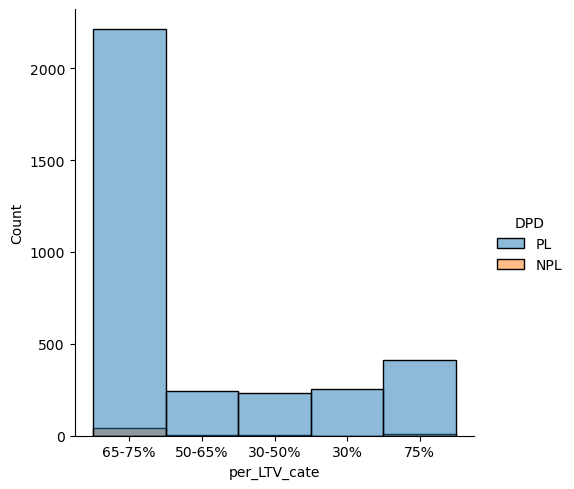

In [138]:
plt.figure(figsize=(15,10))
sns.displot(data=df, x="per_LTV_cate", hue="DPD")

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Principal_Approve_Amount', ylabel='Density'>

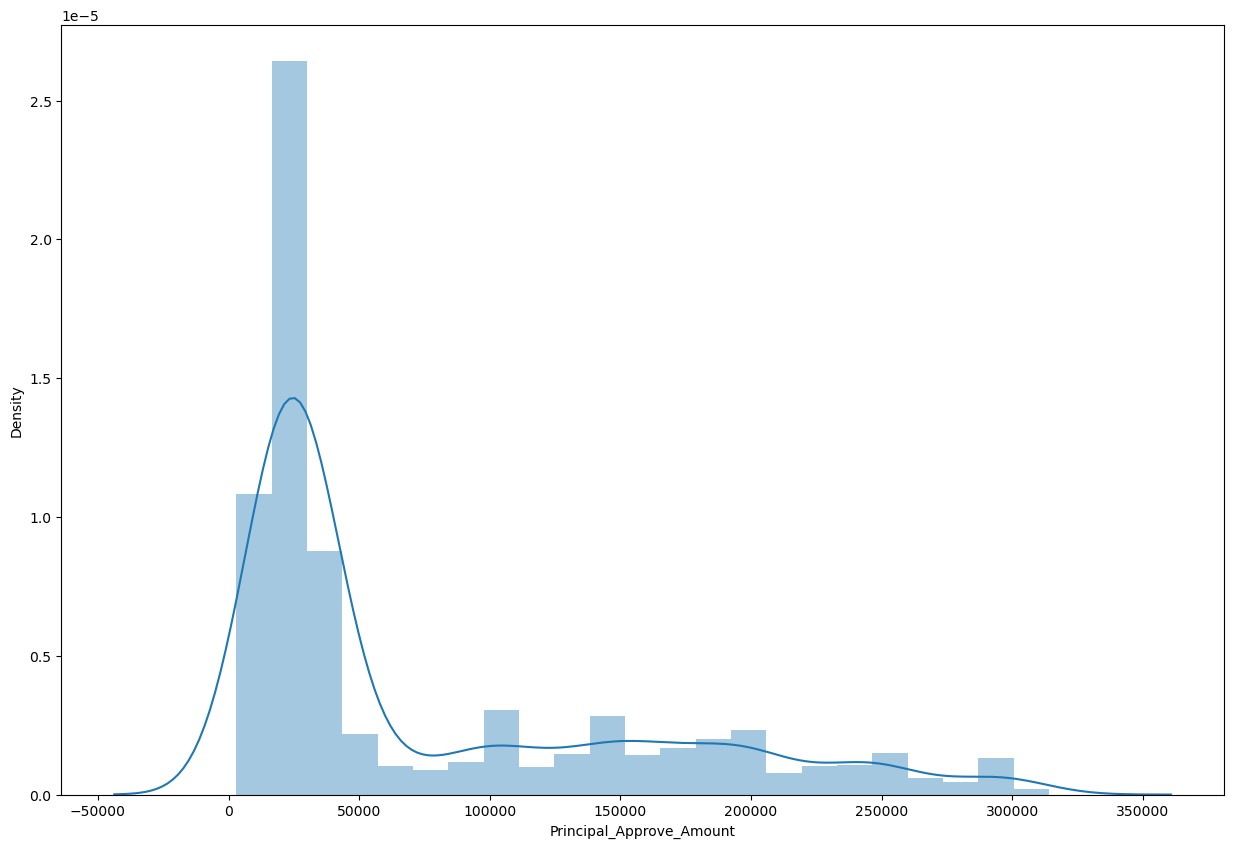

In [139]:
plt.figure(figsize=(15,10))
sns.distplot(df['Principal_Approve_Amount'])

In [140]:
# plt.figure(figsize=(15,10))
# sns.heatmap(df.corr(),annot=True, cmap="BuPu")

In [141]:
df.columns

Index(['Principal_Approve_Amount', 'Principal_Amount',
       'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand',
       'Vehicle_Model', 'Vehicle_Release_Year', 'Vehicle_Sub_Model',
       'Evaluation_Amount', 'System_CAR_Code_(Daily)', 'System_CAR_Code_Date',
       'Final_CAR_Code_Previous_Month', 'DPD', 'age', 'Vehicle_Age', 'per_LTV',
       'per_LTV_cate'],
      dtype='object')

In [142]:
cols = df[['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age']]

In [143]:


X = cols
       # test approve กับ ที่ปล่อย
# X2 = df[['Principal Approve Amount', 'Principal Amount',
#        'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
#        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
#        'Vehicle Release Year', 'age', 'Vehicle Age']]
y = df['DPD']

# Train Test Split

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=101)

In [146]:
X_train.shape

(1875, 12)

In [147]:
X_test.shape

(1535, 12)

In [148]:
y_train.shape

(1875,)

In [149]:
y_test.shape

(1535,)

In [150]:
df[df['DPD']=='PL'].shape

(3355, 20)

In [151]:
df[df['DPD']=='NPL'].shape

(55, 20)

In [152]:
y_train.value_counts()

PL     1834
NPL      41
Name: DPD, dtype: int64

In [153]:
y_test.value_counts()

PL     1521
NPL      14
Name: DPD, dtype: int64

<AxesSubplot:title={'center':'Train target'}>

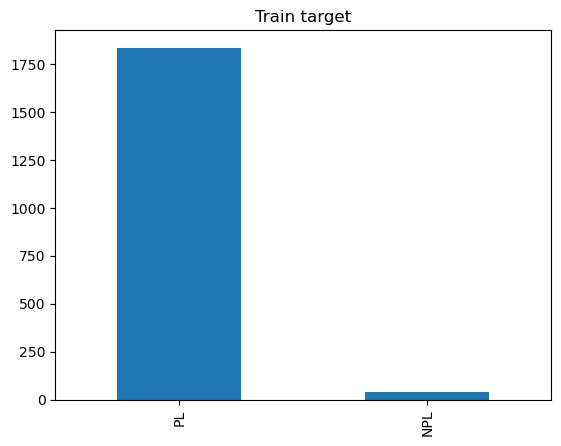

In [154]:
plt.title('Train target')
y_train.value_counts().plot(kind='bar')

In [155]:
df.shape

(3410, 20)

# Imbalance Oversampling SMOTE

In [156]:
#pip install imblearn

In [157]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [158]:
#Fitting SMOTE to the train set
smote = SMOTE(random_state=101)
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)

In [159]:
print('Before sampling class distribution : ', Counter(y_train))
print('After sampling class distribution : ', Counter(smote_y_train))

Before sampling class distribution :  Counter({'PL': 1834, 'NPL': 41})
After sampling class distribution :  Counter({'PL': 1834, 'NPL': 1834})


In [160]:
smote_X_train.shape

(3668, 12)

In [161]:
smote_y_train.shape

(3668,)

In [162]:
smote_y_train.value_counts()

PL     1834
NPL    1834
Name: DPD, dtype: int64

In [163]:
y_test.value_counts()

PL     1521
NPL      14
Name: DPD, dtype: int64

<AxesSubplot:title={'center':'Train target'}>

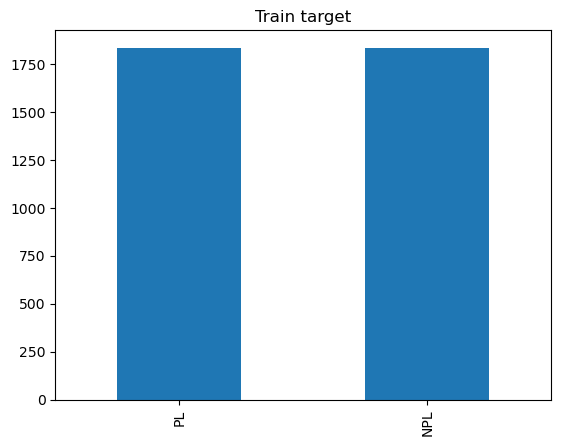

In [164]:
plt.title('Train target')
smote_y_train.value_counts().plot(kind='bar')

In [165]:
plt.title('Test target')
y_test.value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Test target'}>

## Feature Importance Decisiontree

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model=DecisionTreeClassifier(criterion='entropy')

model.fit(smote_X_train, smote_y_train)

DecisionTreeClassifier(criterion='entropy')

In [167]:
X = cols
       # test approve กับ ที่ปล่อย
y = df['DPD']

In [168]:
model.feature_importances_

array([0.1145849 , 0.03292332, 0.00517608, 0.06652924, 0.14990555,
       0.01310487, 0.07130846, 0.1908303 , 0.02316899, 0.20486556,
       0.0546417 , 0.07296104])

In [169]:
fs = pd.Series(model.feature_importances_, index=smote_X_train.columns).sort_values(
    ascending=False
)
fs

Evaluation_Amount               0.204866
Vehicle_Model                   0.190830
Total_Income_Amount_(Month)     0.149906
Principal_Approve_Amount        0.114585
Vehicle_Age                     0.072961
Vehicle_Brand                   0.071308
Occupation_Description          0.066529
age                             0.054642
Repayment_Tenor_Month_Number    0.032923
Vehicle_Release_Year            0.023169
Collateral_Type_Code            0.013105
Gender                          0.005176
dtype: float64

In [170]:
fs.sum()

1.0

<AxesSubplot:>

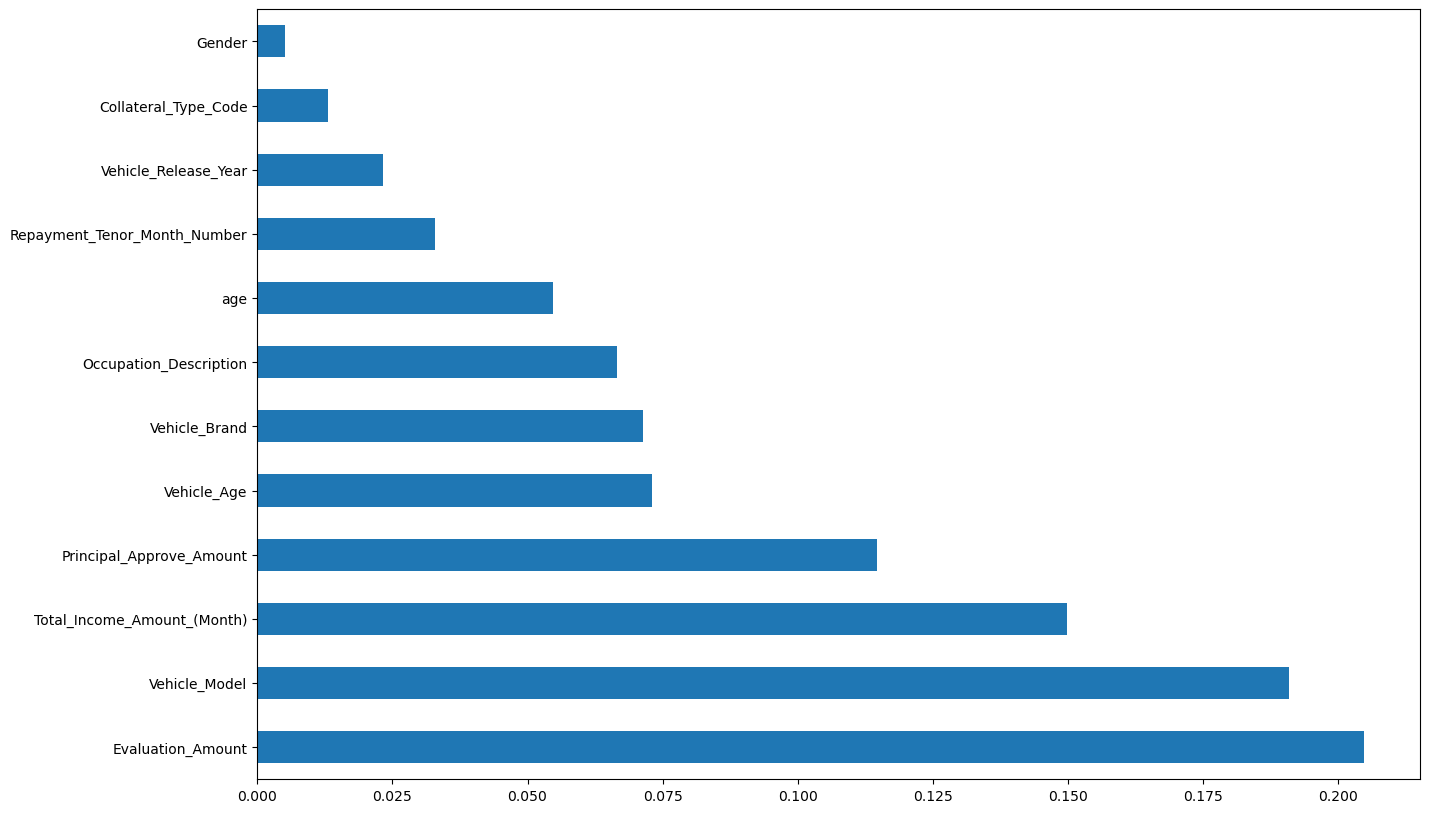

In [171]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

## Cross Validation

In [172]:
# from sklearn.model_selection import cross_val_score
# def classify(model, x,y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=101)
#     model.fit(X_train, y_train)
#     print("Accuracy is : ", model.score(X_test, y_test)*100)
#     #Cross Calidation
#     #eg: cv-5, train-4, test-1
#     score = cross_val_score(model, X, y, cv=10)
#     print(score)
#     print("Cross Validation is ", np.mean(score)*100)

In [173]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    smote_X_train, X_test, smote_y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=101)
    model.fit(smote_X_train, smote_y_train)
    print("Accuracy is : ", model.score(X_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=10)
    print(score)
    print("Cross Validation mean is ", np.mean(score)*100)
    print("Cross Validation std is ", np.std(score)*100)
    return model

In [174]:
# from sklearn.model_selection import cross_val_score,KFold
# from sklearn.linear_model import LogisticRegression

# logreg=LogisticRegression()
# kf=KFold(n_splits=5)
# score=cross_val_score(logreg,X,y,cv=kf)
# print("Cross Validation Scores are {}".format(score))
# print("Average Cross Validation score :{}".format(score.mean()*100))

In [175]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression

# # # Example data:
# # data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# # target = np.array([0, 0, 0, 1, 1, 1])

# # Define the KFold object
# kfold = KFold(n_splits=3, shuffle=True, random_state=0)

# # Initialize the Logistic Regression model
# model = LogisticRegression()

# # Store the results of cross-validation
# results = []
# for train_index, test_index in kfold.split(X):
# X_train, X_test = X[train_index], X[test_index]
# y_train, y_test = y[train_index], y[test_index]

# model.fit(X_train.reshape(-1, 1), y_train)
# score = model.score(X_test.reshape(-1, 1), y_test)
# results.append(score)

# # Average performance across all folds
# avg_result = np.mean(results)
# print("Average accuracy: {:.2f}".format(avg_result))

In [176]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# cv_lr = classify(model,X,y)

In [177]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(criterion='entropy')
# cv_dt = classify(model,X,y)

In [178]:
# sum(cv_dt.predict(X) == y)

In [179]:
# pd.crosstab(y, cv_dt.predict(X))

In [180]:
# 424/(424+54)

In [181]:
# 424/(424+68)

In [182]:
# len(y)

### DecisionTree

In [183]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=101)
classifier = model.fit(smote_X_train,smote_y_train)
classifier

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [184]:
#prediction
y_pred = classifier.predict(X_test)

from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, smote_X_train, smote_y_train, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 92.05211726384364
[0.91553134 0.97275204 0.97547684 0.96185286 0.95912807 0.95912807
 0.95912807 0.95367847 0.95081967 0.94808743]
Cross Validation mean is  95.55582853143939
Cross Validation std is  1.5665836478024835


In [185]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[   2   12]
 [ 110 1411]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.02      0.14      0.03        14
          PL       0.99      0.93      0.96      1521

    accuracy                           0.92      1535
   macro avg       0.50      0.54      0.50      1535
weighted avg       0.98      0.92      0.95      1535



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


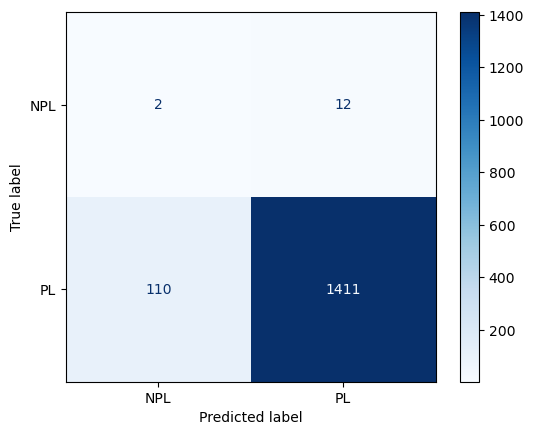

In [186]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


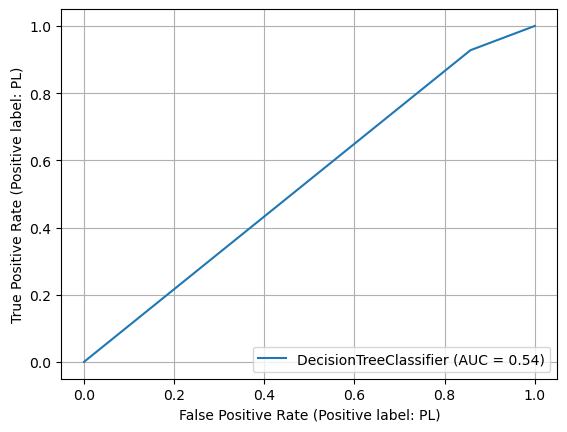

In [187]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

### Prunning

In [188]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=101)
#Predict the response for test dataset
classifier = classifier.fit(smote_X_train, smote_y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy: 70.35830618892508
[0.96187683 0.96187683 0.96187683 0.96187683 0.96480938 0.96480938
 0.95307918 0.96187683 0.96480938 0.96187683]
Cross Validation mean is  96.18768328445746
Cross Validation std is  0.32124490176256043


In [189]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [190]:
import graphviz

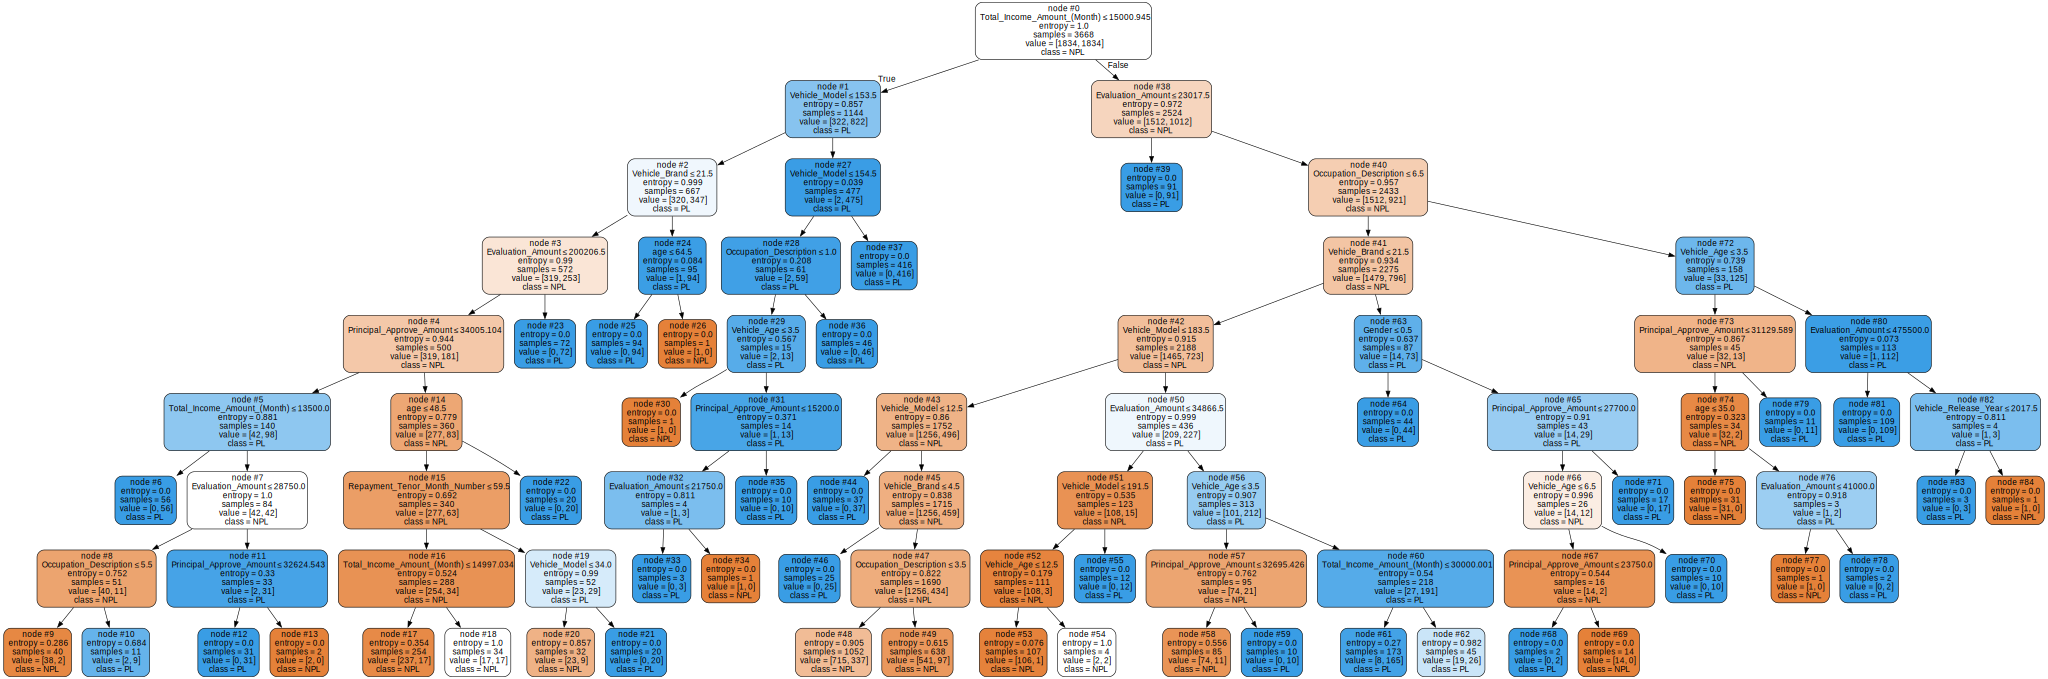

In [191]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],  
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Confusion Metric and Classification report

In [192]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[   6    8]
 [ 447 1074]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.01      0.43      0.03        14
          PL       0.99      0.71      0.83      1521

    accuracy                           0.70      1535
   macro avg       0.50      0.57      0.43      1535
weighted avg       0.98      0.70      0.82      1535



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


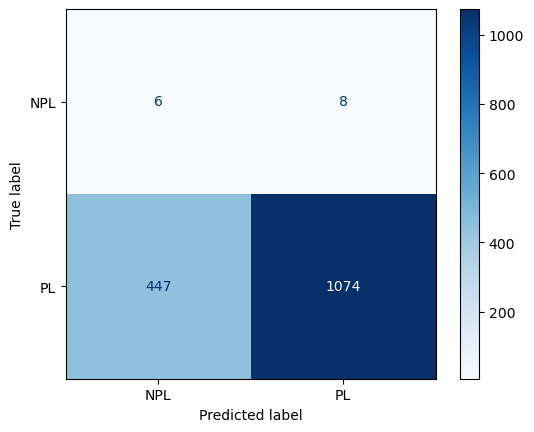

In [193]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


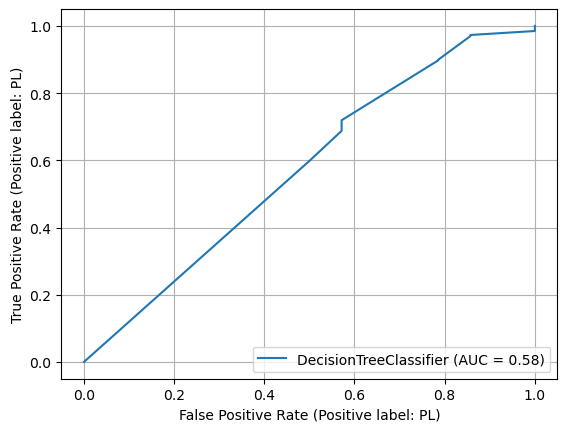

In [194]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

### Random Forest

In [195]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, random_state=101)
classifier = model.fit(smote_X_train,smote_y_train)
classifier

RandomForestClassifier(n_estimators=250, random_state=101)

In [196]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 98.11074918566776
[0.98533724 0.98533724 0.98533724 0.98533724 0.98533724 0.98240469
 0.98240469 0.98240469 0.98240469 0.98240469]
Cross Validation mean is  98.38709677419354
Cross Validation std is  0.14662756598240456


In [197]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[   2   12]
 [  17 1504]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.11      0.14      0.12        14
          PL       0.99      0.99      0.99      1521

    accuracy                           0.98      1535
   macro avg       0.55      0.57      0.56      1535
weighted avg       0.98      0.98      0.98      1535



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


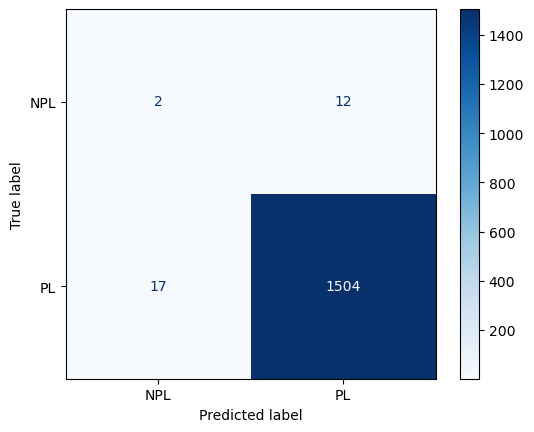

In [198]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


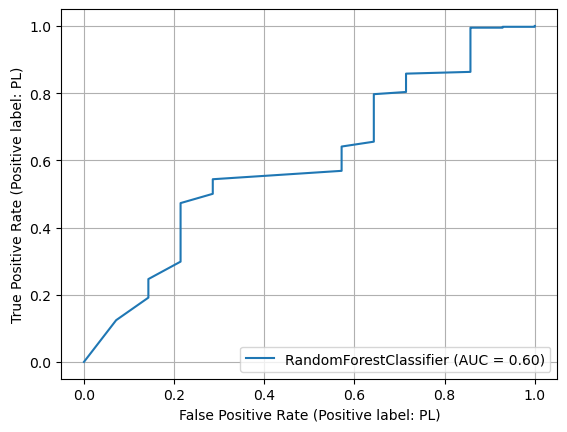

In [199]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

# Under Sampling

In [200]:
from imblearn import under_sampling, over_sampling
from collections import Counter

In [201]:
cols = df[['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age']]

X = cols
# test approve กับ ที่ปล่อย
# X2 = df[['Principal Approve Amount', 'Principal Amount',
#        'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
#        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
#        'Vehicle Release Year', 'age', 'Vehicle Age']]
y = df['DPD']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=101)

<AxesSubplot:>

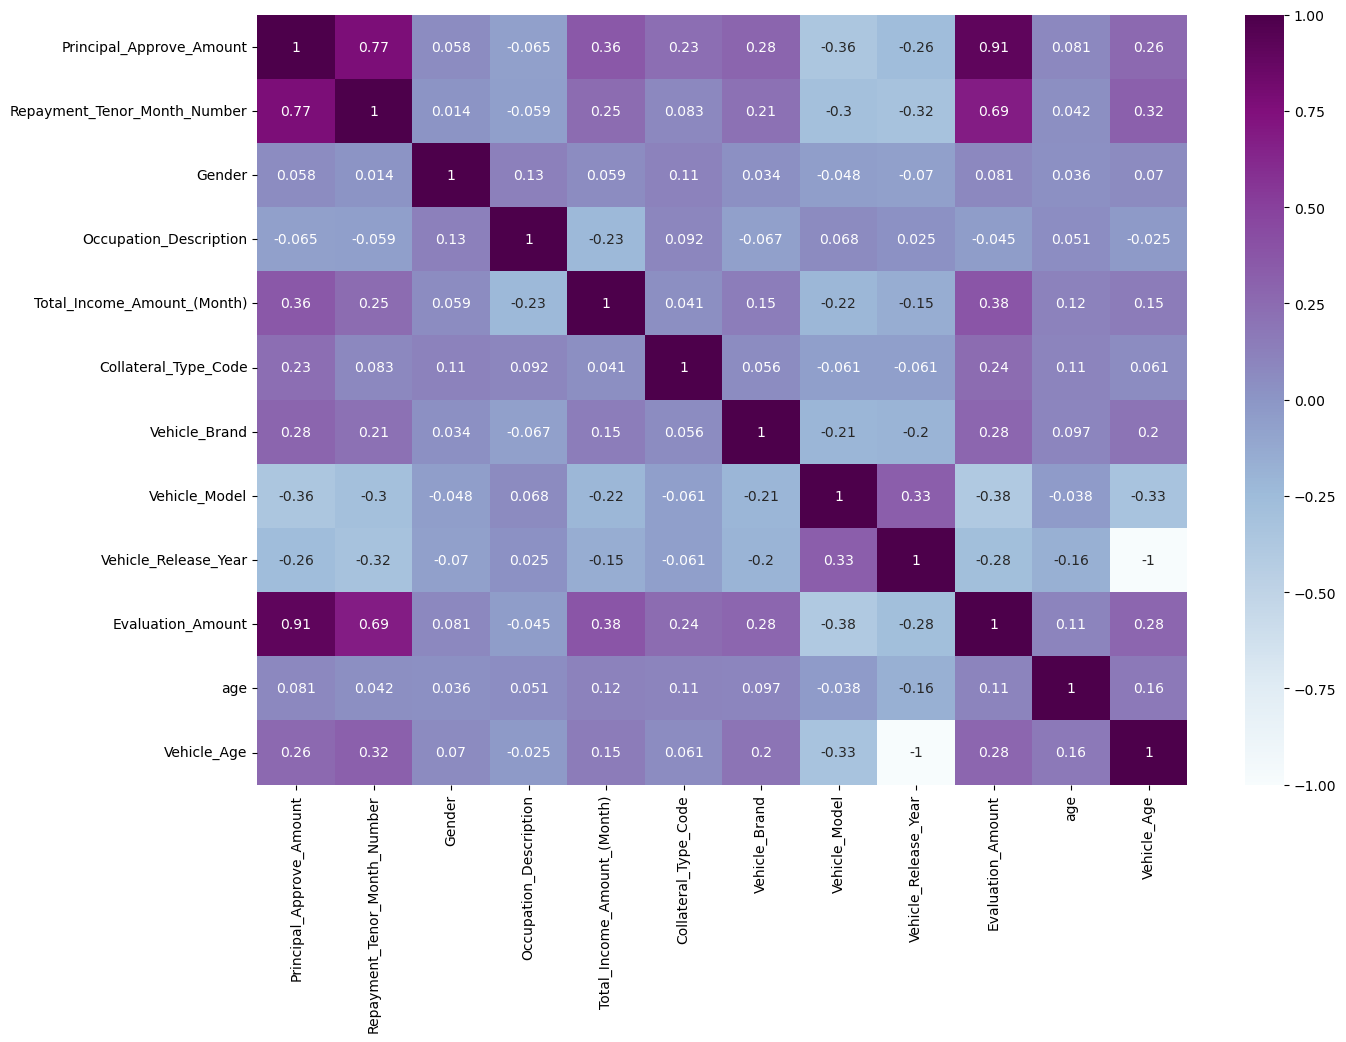

In [202]:
corr = cols.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")

In [203]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=101)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[('NPL', 55), ('PL', 55)] (110,)


In [204]:
print('Before sampling class distribution : ', Counter(y_train))
print('After sampling class distribution : ', Counter(y_resampled))

Before sampling class distribution :  Counter({'PL': 1834, 'NPL': 41})
After sampling class distribution :  Counter({'NPL': 55, 'PL': 55})


In [205]:
X_resampled.shape

(110, 12)

In [206]:
y_resampled.shape

(110,)

In [207]:
X_test.shape

(1535, 12)

In [208]:
y_test.shape

(1535,)

In [209]:
y_resampled.value_counts()

NPL    55
PL     55
Name: DPD, dtype: int64

In [210]:
y_test.value_counts()

PL     1521
NPL      14
Name: DPD, dtype: int64

<AxesSubplot:title={'center':'Train target'}>

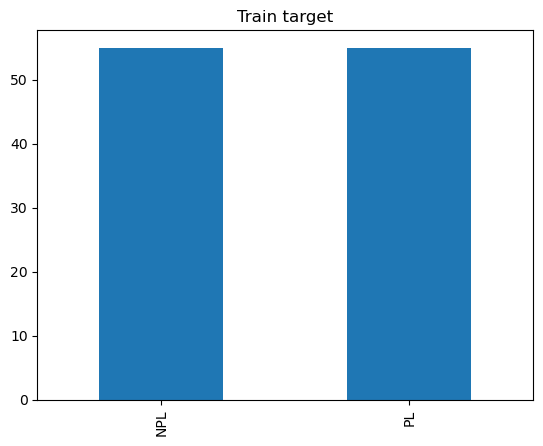

In [211]:
plt.title('Train target')
y_resampled.value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Test target'}>

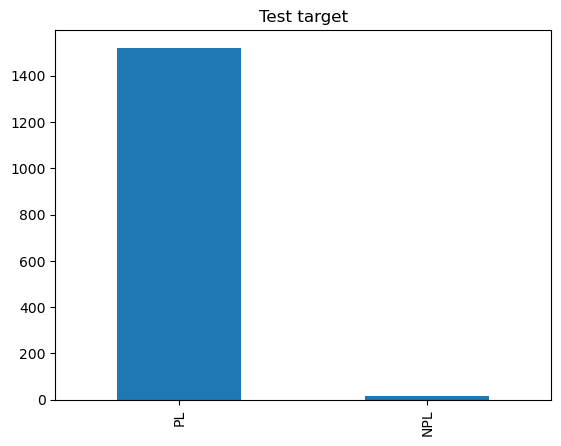

In [212]:
plt.title('Test target')
y_test.value_counts().plot(kind='bar')

## Feature Importance

In [213]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model=DecisionTreeClassifier(criterion='entropy', random_state=101)

model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [214]:
X = cols
y = df['DPD']

In [215]:
model.feature_importances_

array([0.1643057 , 0.03636364, 0.03967753, 0.10493936, 0.12310877,
       0.0320916 , 0.        , 0.14037226, 0.13287758, 0.08649037,
       0.13977319, 0.        ])

In [216]:
fs = pd.Series(model.feature_importances_, index=X_resampled.columns).sort_values(
    ascending=False
)
fs

Principal_Approve_Amount        0.164306
Vehicle_Model                   0.140372
age                             0.139773
Vehicle_Release_Year            0.132878
Total_Income_Amount_(Month)     0.123109
Occupation_Description          0.104939
Evaluation_Amount               0.086490
Gender                          0.039678
Repayment_Tenor_Month_Number    0.036364
Collateral_Type_Code            0.032092
Vehicle_Brand                   0.000000
Vehicle_Age                     0.000000
dtype: float64

In [217]:
fs.sum()

1.0

<AxesSubplot:>

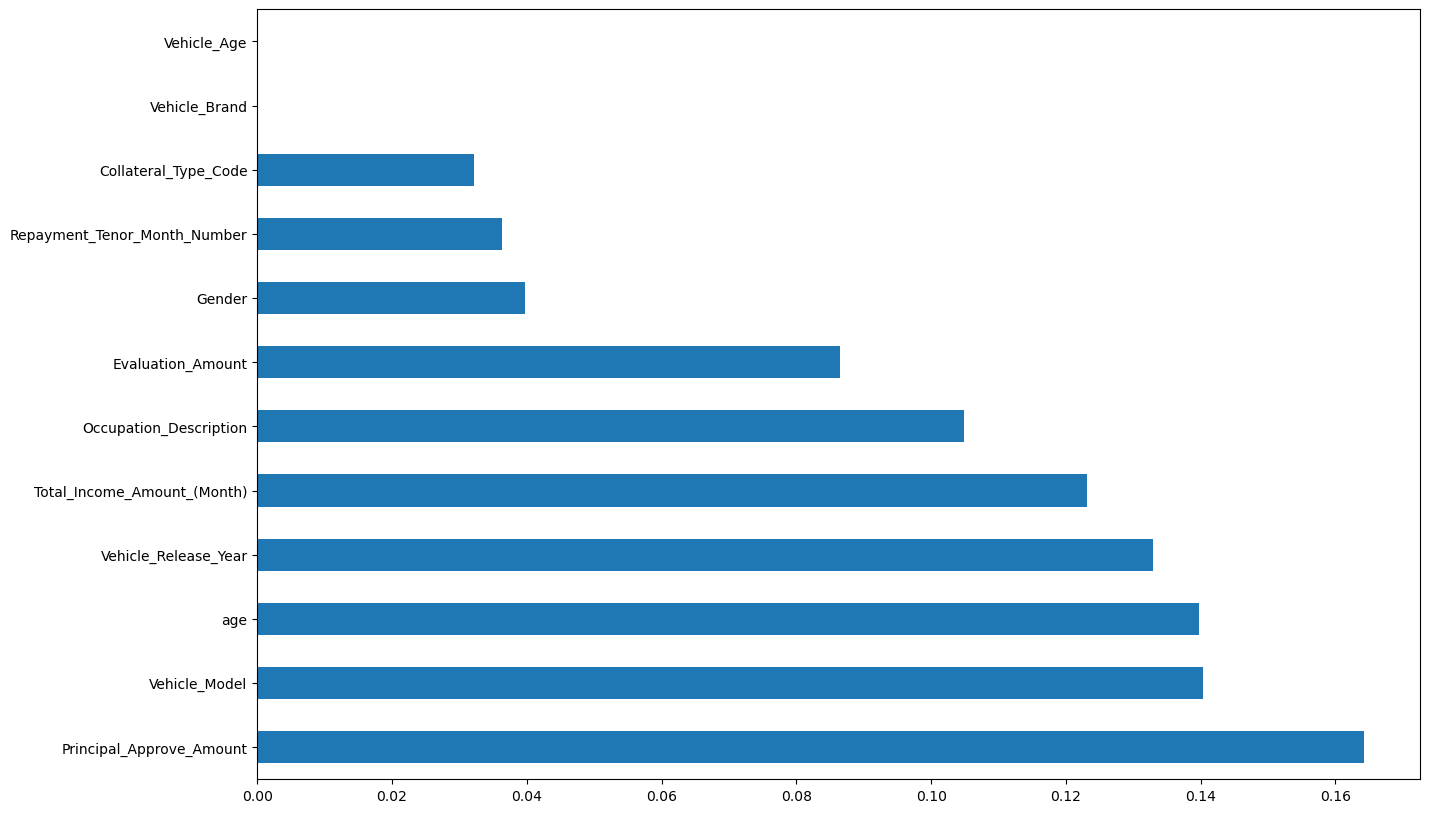

In [218]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

## Cross Validation

In [219]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    X_resampled, X_test, y_resampled, y_test = train_test_split(X, y, test_size=0.45, random_state=101)
    model.fit(X_resampled, y_resampled)
    print("Accuracy is : ", model.score(X_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=10)
    print(score)
    print("Cross Validation is ", np.mean(score)*100)
    print("Cross Validation is ", np.std(score)*100)
    return model

In [220]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(random_state=101)
# cv_lr = classify(model,X,y)

In [221]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(criterion='entropy', random_state=101)
# cv_dt = classify(model,X,y)

### Decision Tree

In [366]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=101)
classifier = model.fit(X_resampled,y_resampled)
classifier

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [367]:
# #prediction
y_pred = classifier.predict(X_test)

from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 55.89576547231271
[0.96187683 0.96187683 0.96187683 0.96187683 0.96480938 0.96480938
 0.95307918 0.96187683 0.96480938 0.96187683]
Cross Validation mean is  96.18768328445746
Cross Validation std is  0.32124490176256043


In [368]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 14   0]
 [677 844]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.02      1.00      0.04        14
          PL       1.00      0.55      0.71      1521

    accuracy                           0.56      1535
   macro avg       0.51      0.78      0.38      1535
weighted avg       0.99      0.56      0.71      1535



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


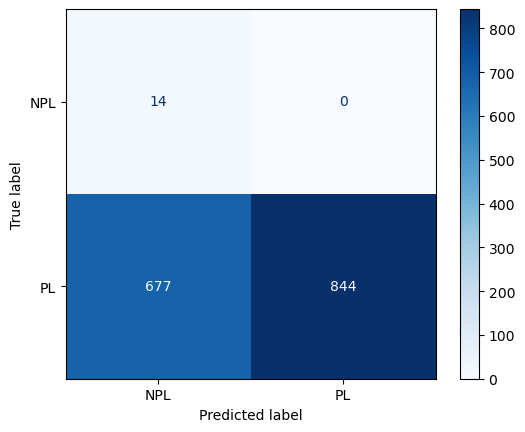

In [369]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


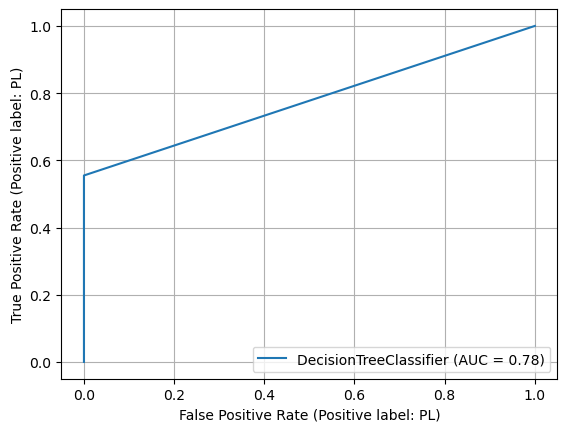

In [370]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

### Prunning

In [380]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=101)
#Predict the response for test dataset
classifier = classifier.fit(X_resampled, y_resampled)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation stdis ", np.std(score)*100)

Accuracy: 61.042345276872965
[0.96187683 0.96187683 0.96187683 0.96187683 0.96480938 0.96480938
 0.95307918 0.96187683 0.96480938 0.96187683]
Cross Validation mean is  96.18768328445746
Cross Validation stdis  0.32124490176256043


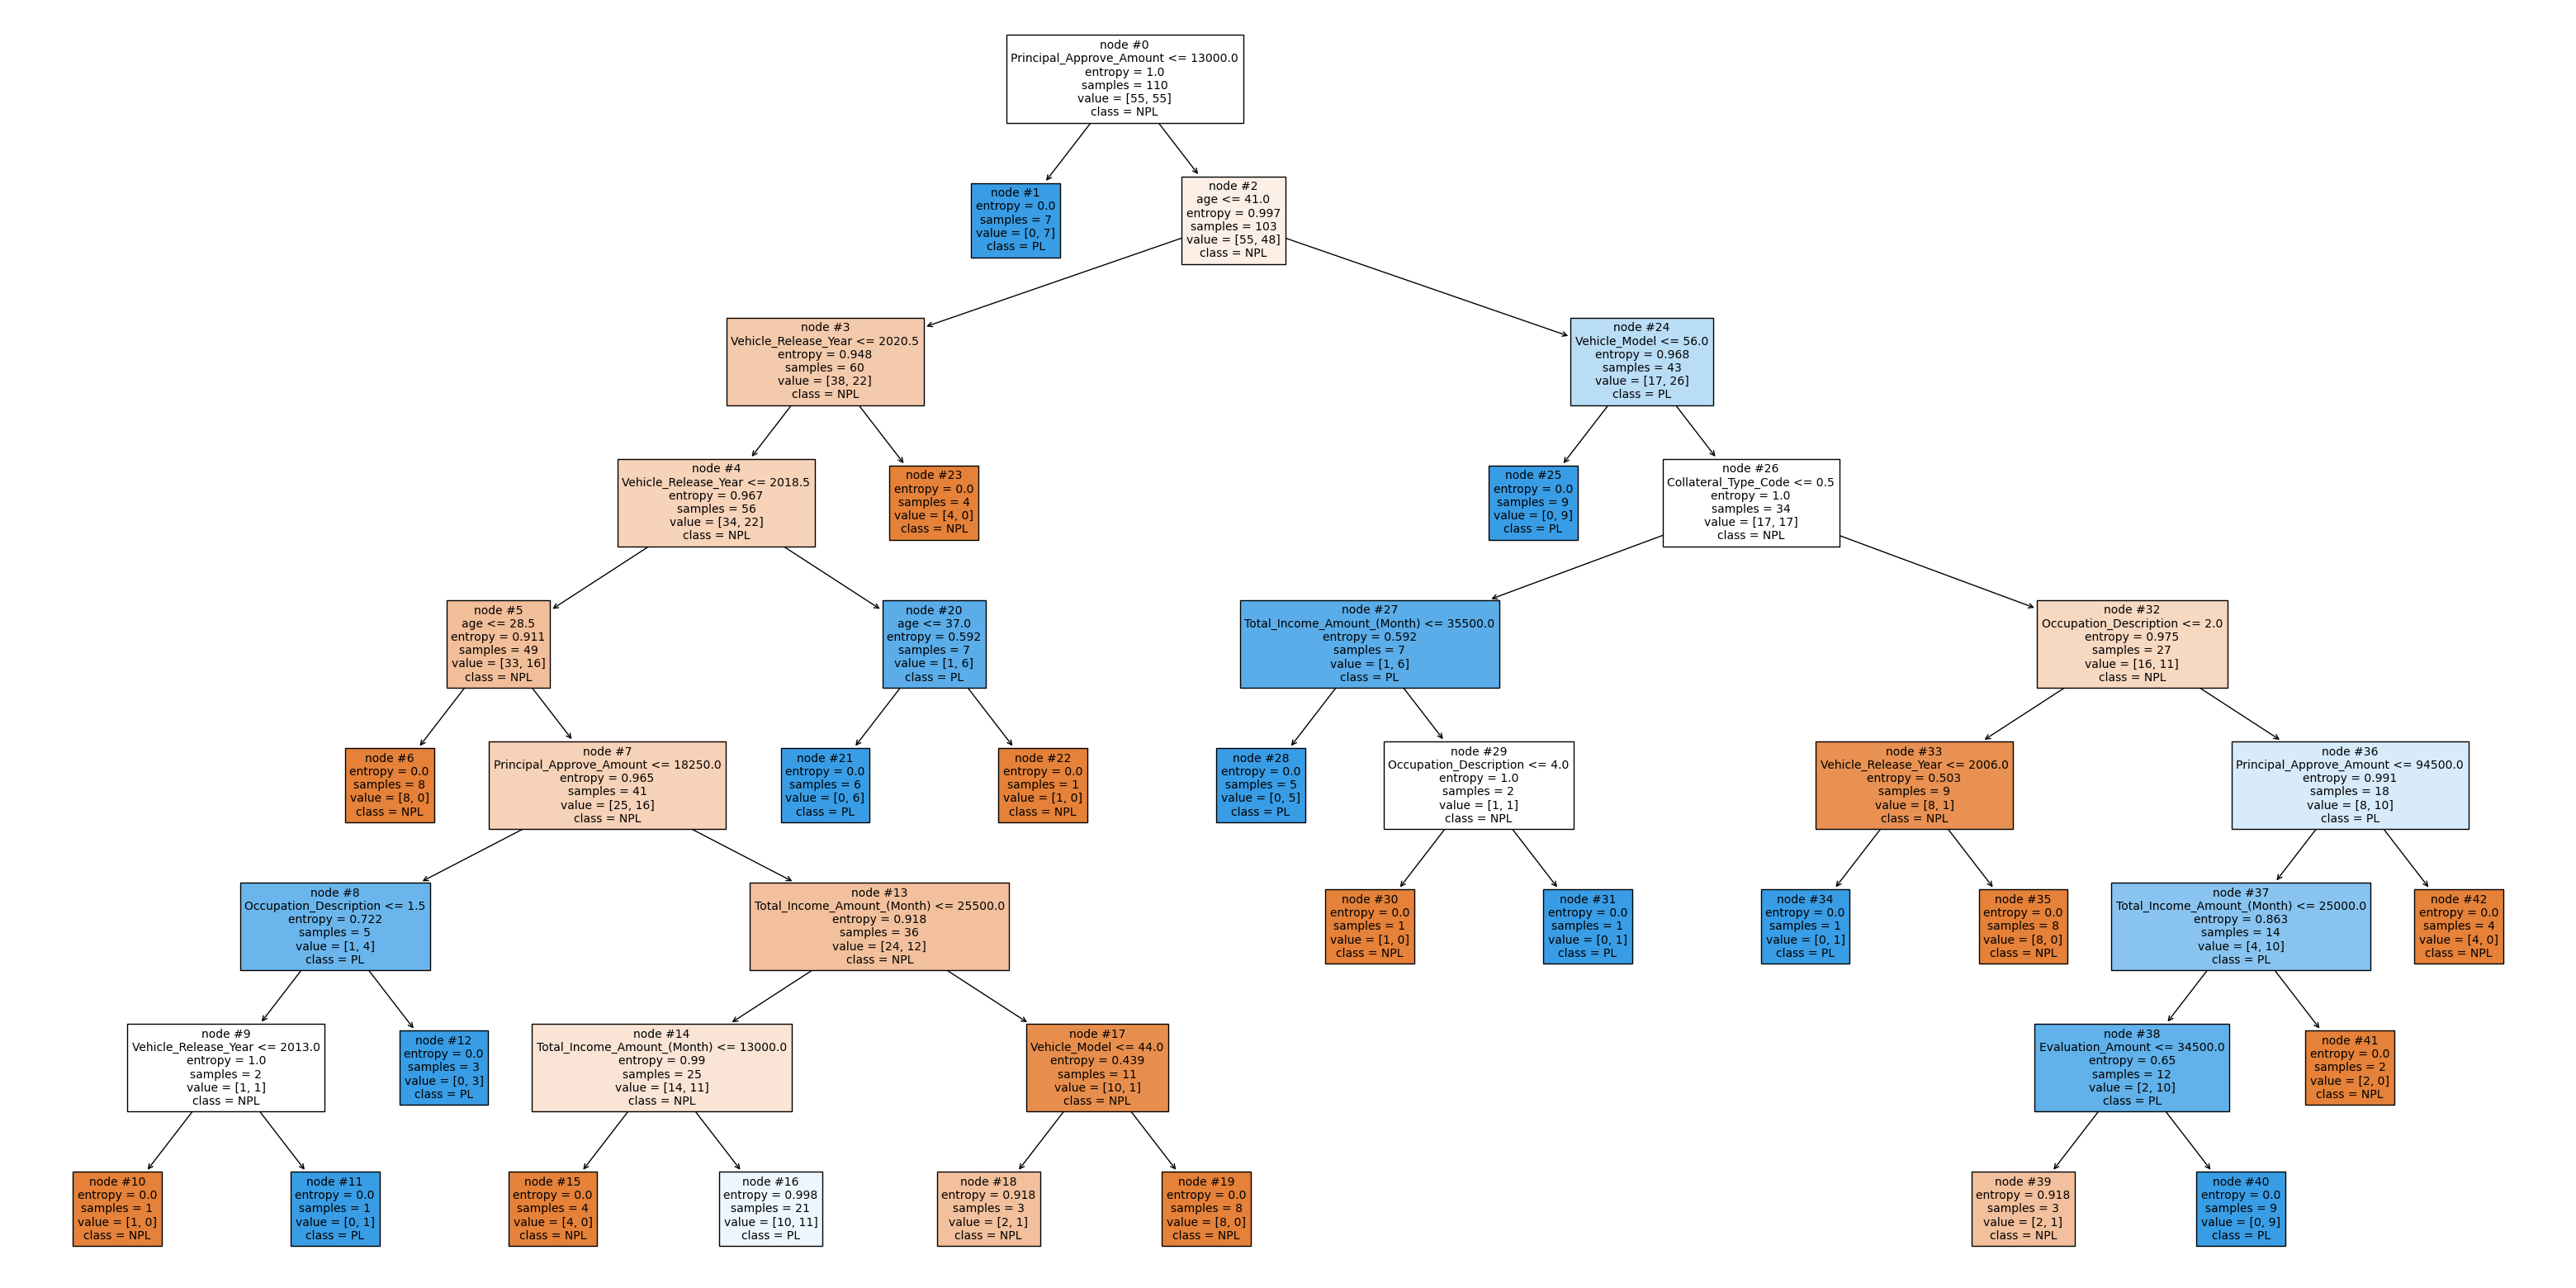

In [381]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [382]:
import graphviz

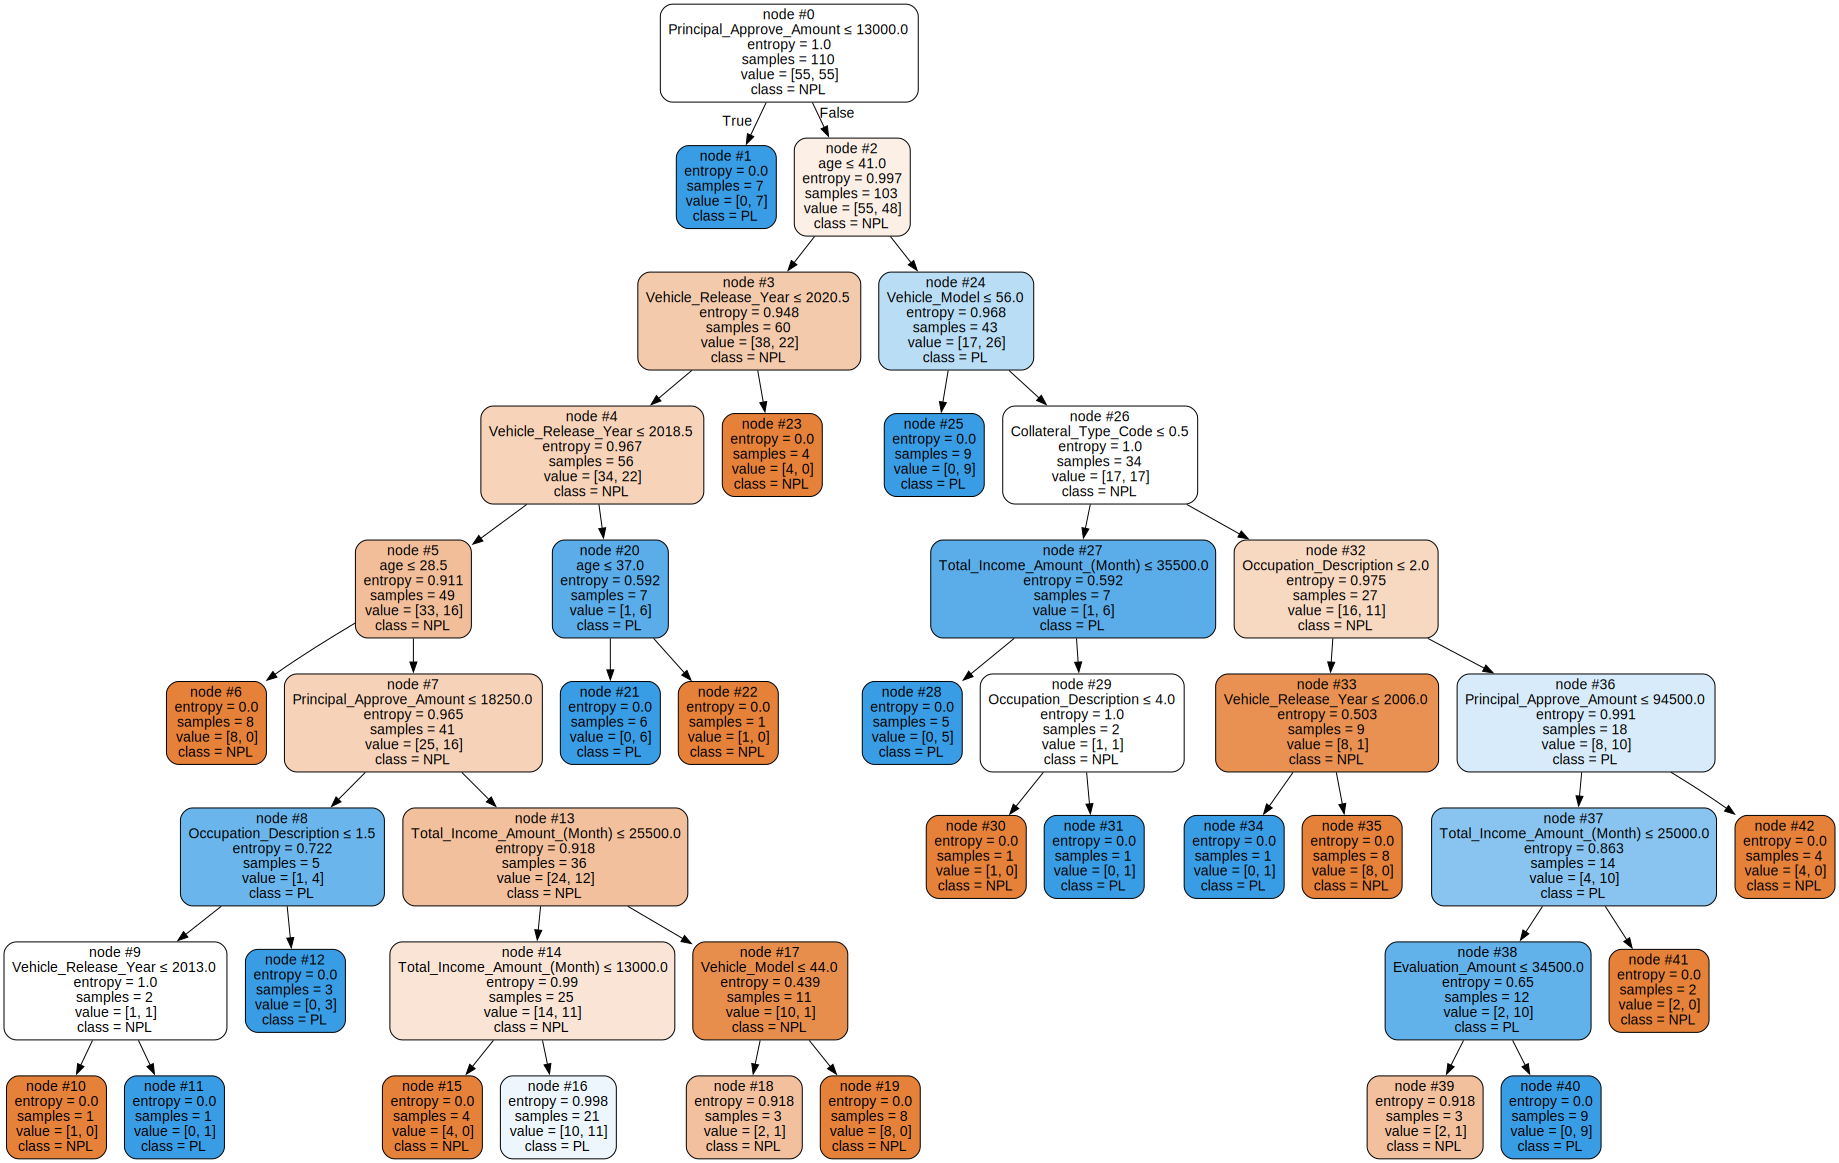

In [383]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Confusion Metric and Classification report

In [384]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 13   1]
 [597 924]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.02      0.93      0.04        14
          PL       1.00      0.61      0.76      1521

    accuracy                           0.61      1535
   macro avg       0.51      0.77      0.40      1535
weighted avg       0.99      0.61      0.75      1535



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


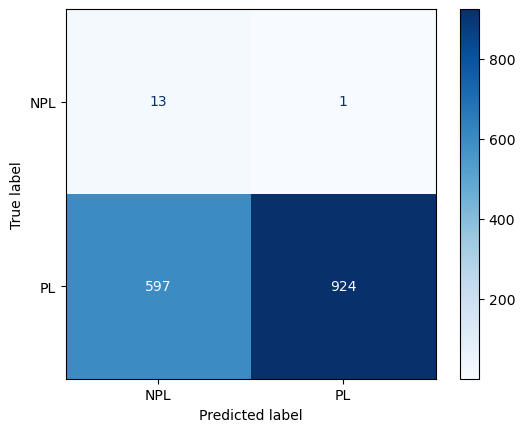

In [385]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


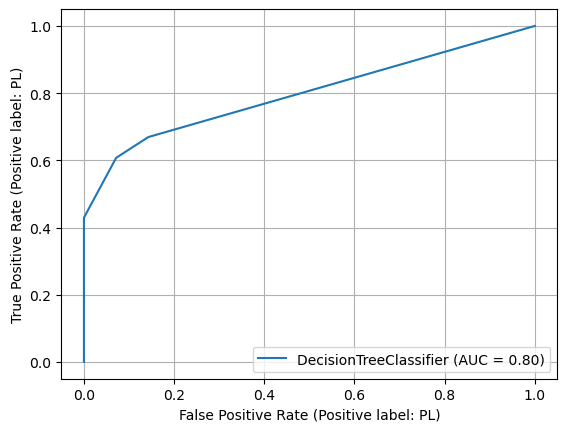

In [386]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

#### Trial and Error ทำ Hyperparemeter Tuning ด้วยการเขียนเอง

In [387]:
# กำหนดค่าพารามิเตอร์ที่ต้องการทดสอบ
max_depths = [3, 4, 5, 6,7,8,9,10,11,12,13,14,15]
min_samples_splits = [2, 3, 4, 5]
min_samples_leaves = [1, 2, 3, 4]

best_accuracy = 0
best_parameters = {}

# ทดสอบโมเดล Decision tree ด้วยค่าพารามิเตอร์ที่ต้องการ
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            clf.fit(X_resampled,y_resampled)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print("max_depth: {}, min_samples_split: {}, min_samples_leaf: {}, accuracy: {}".format(max_depth, min_samples_split, min_samples_leaf, accuracy))
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters['max_depth'] = max_depth
                best_parameters['min_samples_split'] = min_samples_split
                best_parameters['min_samples_leaf'] = min_samples_leaf

# พิมพ์ค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters:", best_parameters)

max_depth: 3, min_samples_split: 2, min_samples_leaf: 1, accuracy: 0.358957654723127
max_depth: 3, min_samples_split: 2, min_samples_leaf: 2, accuracy: 0.358957654723127
max_depth: 3, min_samples_split: 2, min_samples_leaf: 3, accuracy: 0.33680781758957656
max_depth: 3, min_samples_split: 2, min_samples_leaf: 4, accuracy: 0.31530944625407165
max_depth: 3, min_samples_split: 3, min_samples_leaf: 1, accuracy: 0.3511400651465798
max_depth: 3, min_samples_split: 3, min_samples_leaf: 2, accuracy: 0.3511400651465798
max_depth: 3, min_samples_split: 3, min_samples_leaf: 3, accuracy: 0.3446254071661238
max_depth: 3, min_samples_split: 3, min_samples_leaf: 4, accuracy: 0.2990228013029316
max_depth: 3, min_samples_split: 4, min_samples_leaf: 1, accuracy: 0.3511400651465798
max_depth: 3, min_samples_split: 4, min_samples_leaf: 2, accuracy: 0.3511400651465798
max_depth: 3, min_samples_split: 4, min_samples_leaf: 3, accuracy: 0.3446254071661238
max_depth: 3, min_samples_split: 4, min_samples_leaf: 

In [388]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model=DecisionTreeClassifier(max_depth = 5, min_samples_split = 3, min_samples_leaf = 1, random_state=101)

model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=101)

In [389]:
model.feature_importances_

array([0.16346367, 0.03374228, 0.        , 0.09447837, 0.13014878,
       0.        , 0.03374228, 0.14403688, 0.0899794 , 0.09098432,
       0.16384852, 0.05557551])

In [390]:
fs = pd.Series(model.feature_importances_, index=X_resampled.columns).sort_values(
    ascending=False
)
fs

age                             0.163849
Principal_Approve_Amount        0.163464
Vehicle_Model                   0.144037
Total_Income_Amount_(Month)     0.130149
Occupation_Description          0.094478
Evaluation_Amount               0.090984
Vehicle_Release_Year            0.089979
Vehicle_Age                     0.055576
Repayment_Tenor_Month_Number    0.033742
Vehicle_Brand                   0.033742
Gender                          0.000000
Collateral_Type_Code            0.000000
dtype: float64

In [391]:
fs.sum()

1.0

<AxesSubplot:>

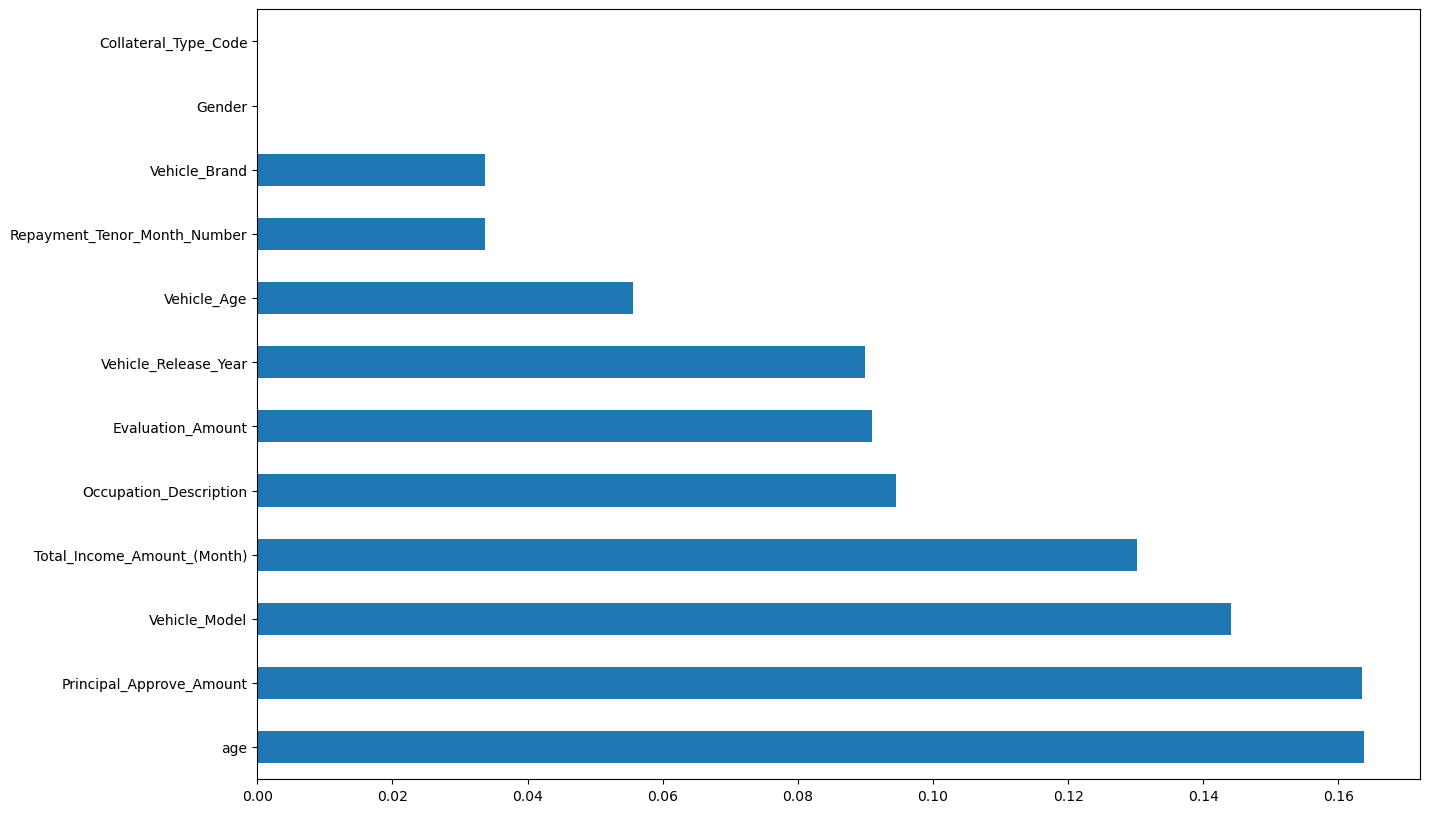

In [392]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

In [393]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 5, min_samples_split = 3, min_samples_leaf = 1, random_state=101)
classifier = model.fit(X_resampled,y_resampled)
classifier

DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=101)

In [394]:
# #prediction
y_pred = classifier.predict(X_test)

from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 43.387622149837135
[0.98533724 0.98533724 0.97947214 0.96774194 0.98533724 0.97947214
 0.98240469 0.97947214 0.98240469 0.98240469]
Cross Validation mean is  98.09384164222875
Cross Validation std is  0.4950716427018803


In [395]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 14   0]
 [869 652]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.02      1.00      0.03        14
          PL       1.00      0.43      0.60      1521

    accuracy                           0.43      1535
   macro avg       0.51      0.71      0.32      1535
weighted avg       0.99      0.43      0.59      1535



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


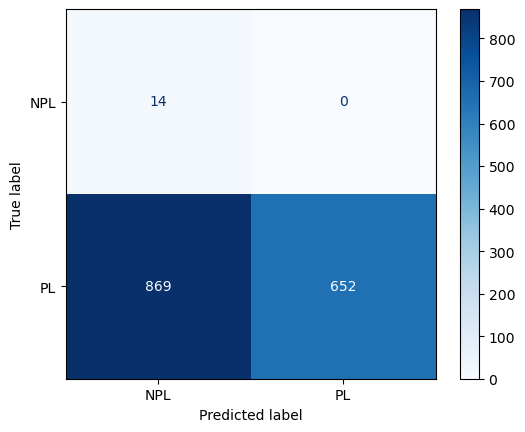

In [396]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


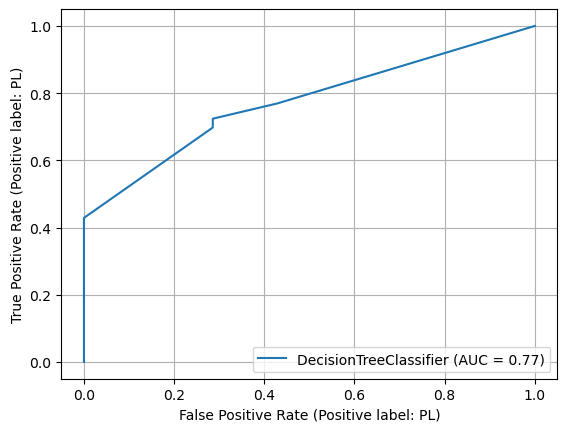

In [397]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

#### Prunning

In [359]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(max_depth = 6, min_samples_split = 3, min_samples_leaf = 1, random_state=101)
#Predict the response for test dataset
classifier = classifier.fit(X_resampled, y_resampled)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation stdis ", np.std(score)*100)

Accuracy: 43.71335504885994
[0.97947214 0.97947214 0.97653959 0.96480938 0.98240469 0.97947214
 0.97947214 0.97947214 0.98240469 0.96480938]
Cross Validation mean is  97.68328445747801
Cross Validation stdis  0.6213964838831987


In [360]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [361]:
import graphviz

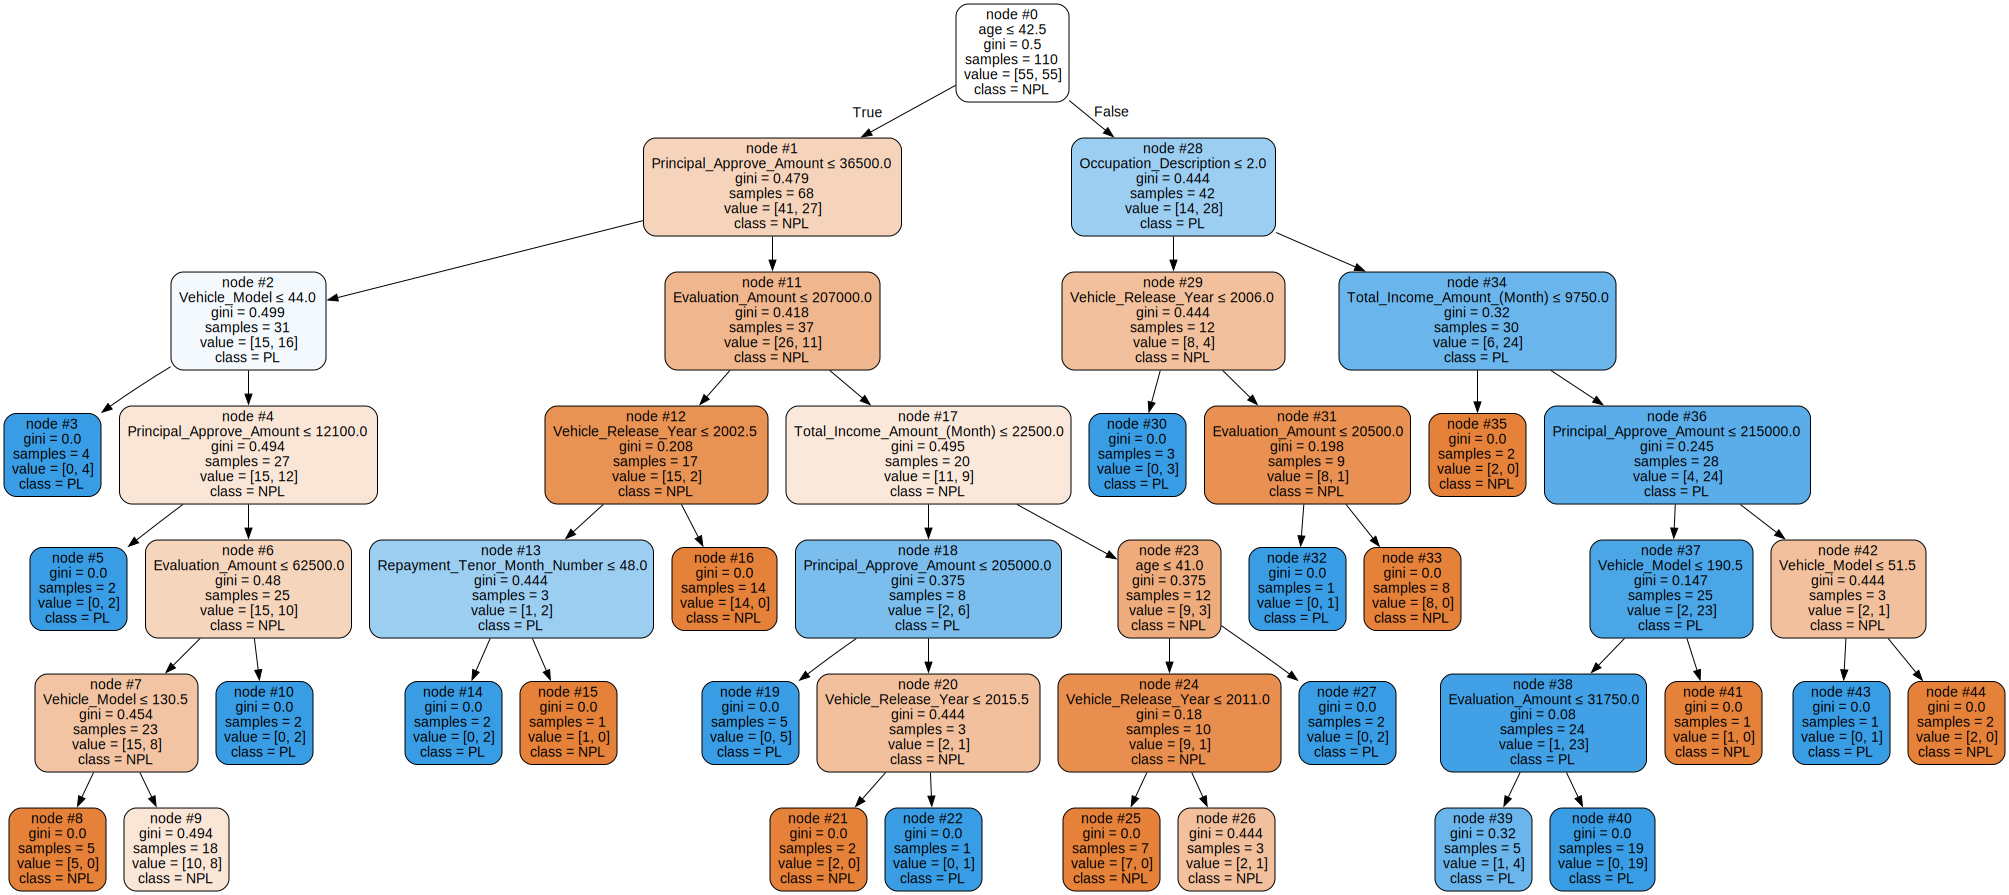

In [362]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [363]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 14   0]
 [864 657]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.02      1.00      0.03        14
          PL       1.00      0.43      0.60      1521

    accuracy                           0.44      1535
   macro avg       0.51      0.72      0.32      1535
weighted avg       0.99      0.44      0.60      1535



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


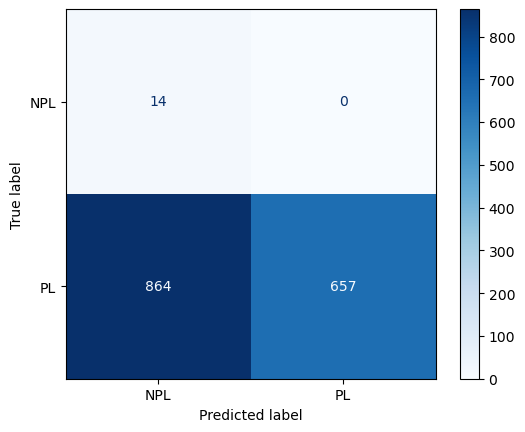

In [364]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

In [365]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


### Random Forest

In [113]:
X_resampled.head(1)

Principal_Approve_Amount  Repayment_Tenor_Month_Number  Gender  \
0                   51000.0                            36       0   

   Occupation_Description  Total_Income_Amount_(Month)  Collateral_Type_Code  \
0                       6                      10000.0                     1   

   Vehicle_Brand  Vehicle_Model  Vehicle_Release_Year  Evaluation_Amount  age  \
0              5            134                  2018              64500   28   

   Vehicle_Age  
0            5

In [114]:
X_new = classifier.predict([[51000,36,0,10,10000,1,5,135,2018,64500,28,5]])

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [399]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250)
rdf_classifier = model.fit(X_resampled,y_resampled)
rdf_classifier

RandomForestClassifier(n_estimators=250)

### Feature Importance

In [400]:
rdf_classifier.feature_importances_

array([0.12901389, 0.06038192, 0.01854482, 0.08639931, 0.11225193,
       0.02225652, 0.03322753, 0.09960718, 0.0862355 , 0.11857397,
       0.15075935, 0.08274809])

In [401]:
fs = pd.Series(rdf_classifier.feature_importances_, index=X_resampled.columns).sort_values(
    ascending=False
)
fs

age                             0.150759
Principal_Approve_Amount        0.129014
Evaluation_Amount               0.118574
Total_Income_Amount_(Month)     0.112252
Vehicle_Model                   0.099607
Occupation_Description          0.086399
Vehicle_Release_Year            0.086235
Vehicle_Age                     0.082748
Repayment_Tenor_Month_Number    0.060382
Vehicle_Brand                   0.033228
Collateral_Type_Code            0.022257
Gender                          0.018545
dtype: float64

In [402]:
fs.sum()

1.0

<AxesSubplot:>

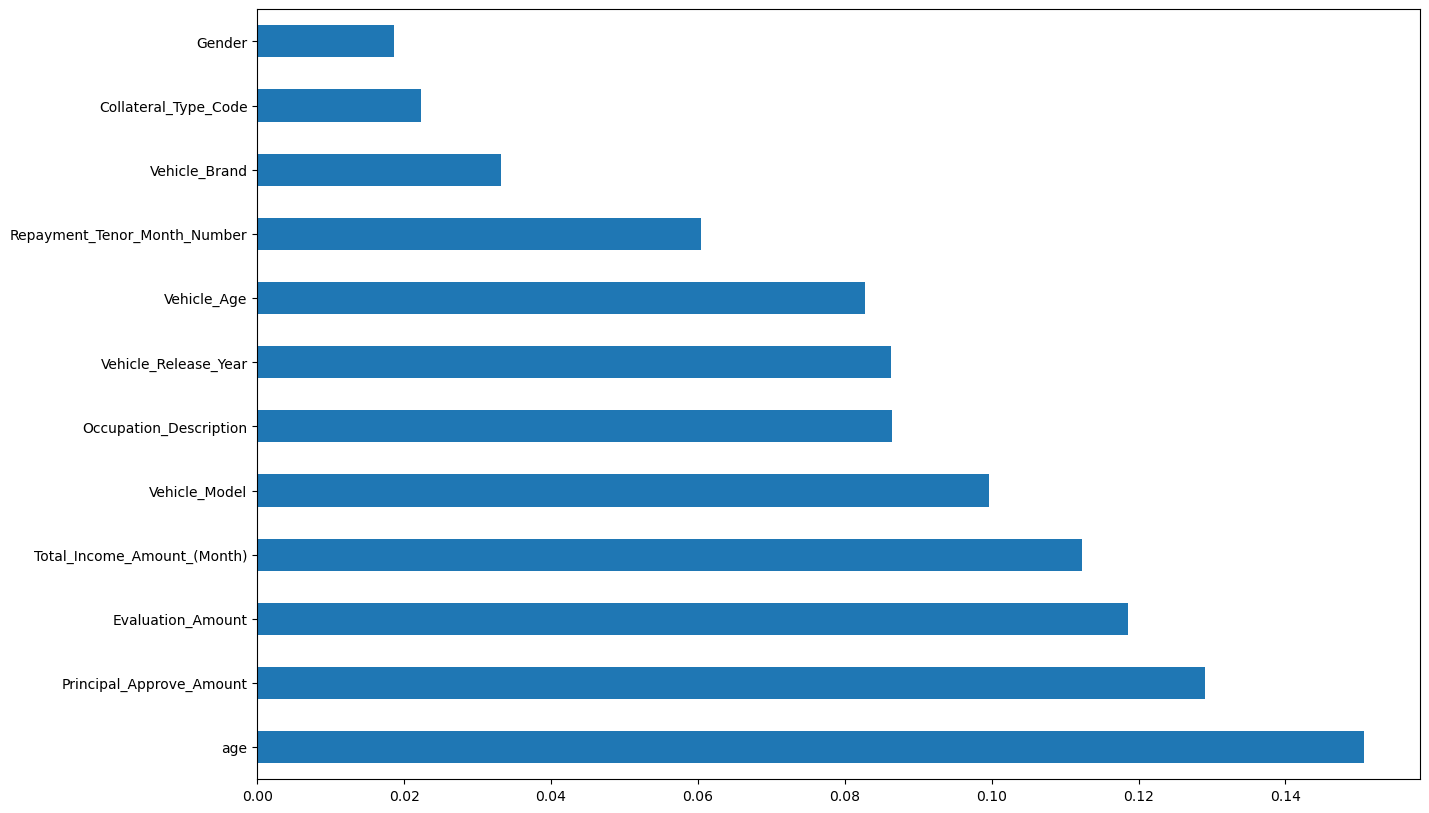

In [403]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

In [404]:
# #pip install shap

# import shap

In [301]:
# explainer = shap.TreeExplainer(rdf_classifier)
# shap_values = explainer.shap_values(X_resampled)

In [302]:
# choosen_instance = X_resampled.loc[[50]]
# shap_values = explainer.shap_values(choosen_instance)
# shap.initjs()
# shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [303]:
# shap.summary_plot(shap_values, X_resampled, plot_type="bar")

In [304]:
# shap.summary_plot(shap_values, X_resampled)

In [405]:
#prediction
y_pred = rdf_classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X_resampled, y_resampled, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 61.563517915309454
[0.63636364 0.63636364 0.63636364 0.45454545 0.72727273 0.54545455
 0.45454545 0.63636364 0.45454545 0.45454545]
Cross Validation mean is  56.363636363636346
Cross Validation std is  9.791208740244553


In [406]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 14   0]
 [590 931]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.02      1.00      0.05        14
          PL       1.00      0.61      0.76      1521

    accuracy                           0.62      1535
   macro avg       0.51      0.81      0.40      1535
weighted avg       0.99      0.62      0.75      1535



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


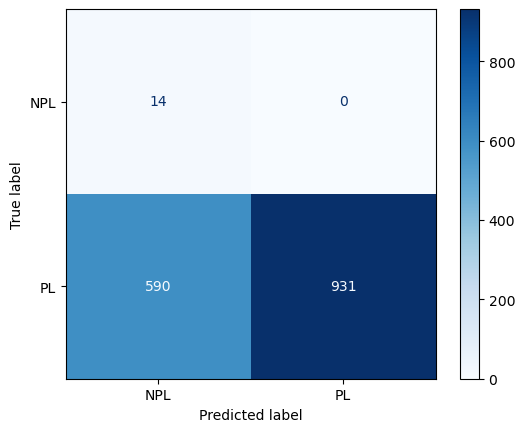

In [407]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(rdf_classifier, X_test, y_test, cmap='Blues', values_format='d')

In [408]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rdf_classifier, X_test, y_test)
plt.grid()

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


#### Trial and Error ทำ Hyperparemeter Tuning ด้วยการเขียนเอง

In [409]:
# n_estimators = [100, 200, 300]
# max_features = ['sqrt', 'log2', None]
# max_depth = [5, 10, 15]
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# max_leaf_nodes = [3, 6, 9]
# criterion = ['gini', 'entropy']

# กำหนดค่า parameter ที่ต้องการปรับค่า
criterion = ['gini', 'entropy']
n_estimators = [100, 200, 300, 400]
max_depth = [None, 5, 10, 20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# กำหนดค่าเริ่มต้นของ parameter
best_score = 0
best_params = {}

# ลูปผ่าน parameter แต่ละตัว
for c in criterion:
    for n in n_estimators:
        for d in max_depth:
            for s in min_samples_split:
                for l in min_samples_leaf:
                    # สร้าง model และ fit ข้อมูล
                    rf = RandomForestClassifier(criterion=c, n_estimators=n, max_depth=d,
                                                min_samples_split=s, min_samples_leaf=l)
                    rf.fit(X_resampled,y_resampled)

                    # ทำนายผล validation set และคำนวณค่าความแม่นยำ
                    y_pred = rf.predict(X_test)
                    score = accuracy_score(y_test, y_pred)

                    # เลือก parameter ที่ให้ค่าความแม่นยำสูงสุด
                    if score > best_score:
                        best_score = score
                        best_params = {'criterion':c, 'n_estimators': n, 'max_depth': d, 'min_samples_split': s, 'min_samples_leaf': l}

# สร้างโมเดล Random Forest ด้วย parameter ที่ดีที่สุด
rf_best = RandomForestClassifier(criterion=best_params['criterion'], n_estimators=best_params['n_estimators'],
                                 max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'],
                                 min_samples_leaf=best_params['min_samples_leaf'])
rf_best.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=10)

In [410]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=10)
rdf_classifier = model.fit(X_resampled,y_resampled)
rdf_classifier

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=10)

#### Feature Importance

In [411]:
rdf_classifier.feature_importances_

array([0.15717744, 0.04189722, 0.00901448, 0.08230535, 0.10156386,
       0.02578977, 0.02991927, 0.10341777, 0.09475097, 0.1048024 ,
       0.15977292, 0.08958856])

In [412]:
fs = pd.Series(rdf_classifier.feature_importances_, index=X_resampled.columns).sort_values(
    ascending=False
)
fs

age                             0.159773
Principal_Approve_Amount        0.157177
Evaluation_Amount               0.104802
Vehicle_Model                   0.103418
Total_Income_Amount_(Month)     0.101564
Vehicle_Release_Year            0.094751
Vehicle_Age                     0.089589
Occupation_Description          0.082305
Repayment_Tenor_Month_Number    0.041897
Vehicle_Brand                   0.029919
Collateral_Type_Code            0.025790
Gender                          0.009014
dtype: float64

In [413]:
fs.sum()

1.0

In [414]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

<AxesSubplot:>

In [415]:
#prediction
y_pred = rdf_classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X_resampled, y_resampled, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 59.934853420195445
[0.63636364 0.63636364 0.54545455 0.54545455 0.81818182 0.45454545
 0.36363636 0.54545455 0.45454545 0.45454545]
Cross Validation mean is  54.54545454545453
Cross Validation std is  12.196734422726127


In [416]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 14   0]
 [615 906]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.02      1.00      0.04        14
          PL       1.00      0.60      0.75      1521

    accuracy                           0.60      1535
   macro avg       0.51      0.80      0.40      1535
weighted avg       0.99      0.60      0.74      1535



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


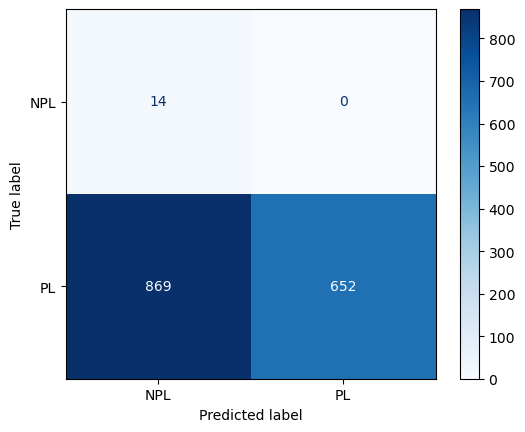

In [417]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

In [418]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rdf_classifier, X_test, y_test)
plt.grid()

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


### Export Model to Streamlit

In [419]:
import pickle

In [420]:
pickle_out = open("RandomForest.pkl", "wb")
pickle.dump(rdf_classifier, pickle_out)
pickle_out.close()

### Hyperparameter Tuning- GridSearchCV

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score

In [129]:
# # Generate a synthetic dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=101)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [130]:
# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [3, 6, 9],
    'criterion':['gini', 'entropy']
}

In [131]:
# Instantiate a random forest classifier
rf = RandomForestClassifier(random_state=101)

In [132]:
# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, scoring='f1_macro')
grid_search.fit(X_resampled, y_resampled)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=10, max_features=None, max_leaf_nodes=9,
                       min_samples_split=10, random_state=101)


In [133]:
# Print the best hyperparameters and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_*100)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy: {:.2f}%".format(accuracy*100))
print("F1 score: {:.2f}".format(f1))

Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best score:  55.88772338772338
Accuracy: 54.85%
F1 score: 0.37


In [134]:
model_grid = RandomForestClassifier(criterion='gini', max_depth=5, max_features='sqrt',
                                    max_leaf_nodes=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100)
model_grid.fit(X_resampled, y_resampled)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

         NPL       0.79      0.02      0.03       659
          PL       0.57      1.00      0.73       876

    accuracy                           0.58      1535
   macro avg       0.68      0.51      0.38      1535
weighted avg       0.66      0.58      0.43      1535



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


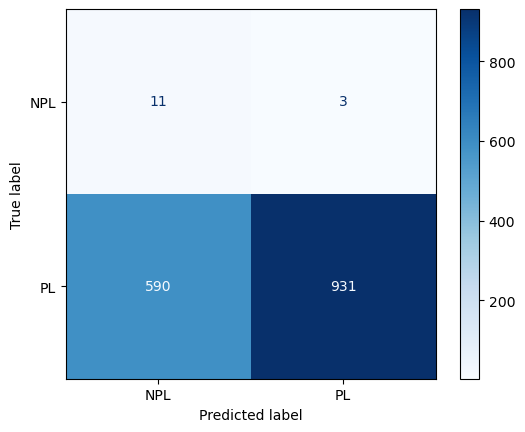

In [135]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(model_grid, X_test, y_test, cmap='Blues', values_format='d')

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rdf_classifier, X_test, y_test)
plt.grid()

### Export Model with Hypertuning GrifSearchCV

In [136]:
import pickle

In [137]:
pickle_out = open("RandomForest-GridSearchCV.pkl", "wb")
pickle.dump(rdf_classifier, pickle_out)
pickle_out.close()

### Hyperparameter Tuning- RandomizedSearchCV

In [138]:
from sklearn.model_selection import RandomizedSearchCV

In [139]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_resampled, y_resampled)
print(random_search.best_estimator_)
print("Accuracy: {:.2f}%".format(accuracy*100))

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       max_leaf_nodes=9, min_samples_leaf=2,
                       min_samples_split=10)
Accuracy: 54.85%


In [140]:
# Print the best hyperparameters and corresponding score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_*100)

model_random = RandomForestClassifier(criterion='entropy',
                                      max_depth=15,
                                      max_features='log2',
                                      max_leaf_nodes=3,
                                      min_samples_split=2,
                                      n_estimators=200)
model_random.fit(X_resampled, y_resampled)
y_pred_rand = model.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy*100))
print(classification_report(y_pred_rand, y_test))

Best parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_leaf_nodes': 9, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}
Best score:  54.545454545454554
Accuracy: 54.85%
              precision    recall  f1-score   support

         NPL       0.79      0.02      0.03       659
          PL       0.57      1.00      0.73       876

    accuracy                           0.58      1535
   macro avg       0.68      0.51      0.38      1535
weighted avg       0.66      0.58      0.43      1535



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


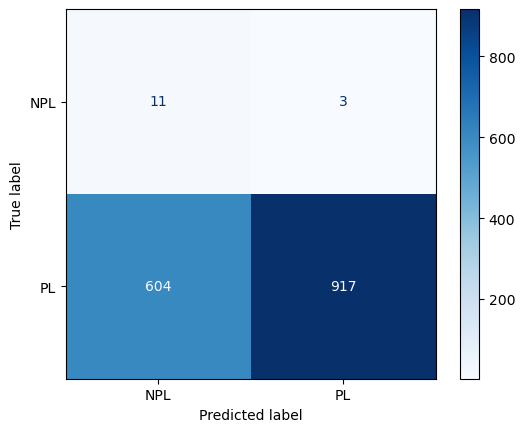

In [141]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(model_random, X_test, y_test, cmap='Blues', values_format='d')

### Export Model with Hypertuning RandomizedSearchCV

In [142]:
pickle_out = open("RandomForest-RandomizedSearchCV.pkl", "wb")
pickle.dump(rdf_classifier, pickle_out)
pickle_out.close()